En primer lugar importamos las líbrerías pandas y numpy

In [1]:
import numpy as np
import pandas as pd

Luego leo el archivo CSV

In [2]:
#Esta es la ubicación del archivo CSV en mi computadora
csv_path = 'C:/Users/FranciscoJH/Downloads/data_latinoamerica.csv'
try:
    df_latinoamerica = pd.read_csv(csv_path)
    print('Archivo leído correctamente.')
    display(df_latinoamerica.head())
except FileNotFoundError:
    print('Error al leer el CSV. Verifica la ruta del archivo.')

Archivo leído correctamente.


,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


Compruebo que la cantidad de registros y columnas sea la correcta

In [3]:
try:
    df_latinoamerica  # comprobar si la variable existe
except NameError:
    print('df_latinoamerica no está definido. Asegúrate de ejecutar la celda que carga el CSV primero.')
else:
    print(df_latinoamerica.shape)

(12216057, 50)


Selecciono los países donde se busca expandir Biogenesys

In [4]:
selected_countries = ['CO', 'AR', 'CL', 'MX', 'PE', 'BR'] # Países por los que filtro el DataFrame

try:
    df_latinoamerica
except NameError:
    print('df_latinoamerica no está definido. Ejecuta primero la celda que carga el CSV.')
else:
    if 'location_key' not in df_latinoamerica.columns:
        print("La columna 'location_key' no existe en el DataFrame. Columnas disponibles:", df_latinoamerica.columns.tolist())
    else:
        df_expansion = df_latinoamerica[df_latinoamerica['location_key'].isin(selected_countries)].copy()

Filtro los datos para fechas mayores a 2021-01-01

In [5]:
# Filtrar por fecha > 2021-01-01
cutoff = pd.to_datetime('2021-01-01')

# Convertir a datetime la columna date y luego filtrar
try:
    df_expansion['date'] = pd.to_datetime(df_expansion['date'], errors='coerce')
    df_expansion = df_expansion[df_expansion['date'] > cutoff].copy()
except Exception as e:
    print('Error al filtrar por fecha:', e)

Limpieza Preliminar:
1. La columna 'date' debe ser de tipo datetime, esto ya se hizo anteriormente para filtrar el dataframe<br>
2. Se eliminarán los registros que tengan valores nulos en todas las columnas

In [6]:
df_expansion.dropna(how='all', inplace=True) 
#El dataframe no tiene filas con estas características
# se puede comprobar con la siguiente linea print(df_expansion.shape), colocandola antes y despues de ejecutar dropna

3. Cambio los tipos de datos de las columnas country_code, location_key y country_name a string

In [7]:
cols_to_string = ['location_key','country_code', 'country_name']
for c in cols_to_string:
    if c in df_expansion.columns:
        df_expansion[c] = df_expansion[c].astype('string')
    else:
        print(f"Columna no encontrada en df_expansion: {c}")

4. Las columnas que almacenan los datos acerca de la población serán enteros, ya que no son necesarios los decimales. Menos la columna population_density que se mantendrá como float.

In [8]:
pop_cols = [
    'population', 'population_male', 'population_female',
    'population_rural', 'population_urban',
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older',
    'population_largest_city' 
]

try:
    df_expansion
except NameError:
    print('df_expansion no está definido. Ejecuta primero la celda que crea df_expansion.')
else:
    present = [c for c in pop_cols if c in df_expansion.columns]
    missing = [c for c in pop_cols if c not in df_expansion.columns]
    if missing:
        print('No encontré estas columnas en df_expansion:', missing)
    if not present:
        print('No hay columnas de población presentes para convertir.')
    else:
        # Convertir a numérico (coerce), redondear y pasar a dtype entero nullable Int64
        for c in present:
            # intentar convertir a numérico
            df_expansion[c] = pd.to_numeric(df_expansion[c], errors='coerce')
            # redondear al entero más cercano y convertir a Int64 (soporta NA)
            df_expansion[c] = df_expansion[c].round(0).astype('Int64')

5. Las columnas new_confirmed, 
    new_deceased, 
    cumulative_confirmed,
    cumulative_deceased,
    cumulative_vaccine_doses_administered,
    new_recovered,
    cumulative_recovered, también serán de tipo entero



In [9]:
pop_cols = ['new_confirmed', 
    'new_deceased', 
    'cumulative_confirmed',
    'cumulative_deceased',
    'cumulative_vaccine_doses_administered',
    'new_recovered',
    'cumulative_recovered'  
]

try:
    df_expansion
except NameError:
    print('df_expansion no está definido. Ejecuta primero la celda que crea df_expansion.')
else:
    present = [c for c in pop_cols if c in df_expansion.columns]
    missing = [c for c in pop_cols if c not in df_expansion.columns]
    if missing:
        print('No encontré estas columnas en df_expansion:', missing)
    if not present:
        print('No hay columnas de población presentes para convertir.')
    else:
        # Convertir a numérico, redondear y pasar a dtype entero nullable Int64
        for c in present:
            # intentar convertir a numérico
            df_expansion[c] = pd.to_numeric(df_expansion[c], errors='coerce')
            # redondear al entero más cercano en caso de que sean de tipo float y convertir a Int64 
            df_expansion[c] = df_expansion[c].round(0).astype('Int64')

6. Para los valores faltantes, decidí agrupar los registros por país, y reemplazarlos por la mediana de cada columna del dataframe. Si la mediana por país no se encuentra, entonces lo reemplazo por la mediana global de la columna.

In [10]:
country_col = 'country_name'

try:
    df_expansion
except NameError:
    print('df_expansion no está definido. Ejecuta la celda que crea df_expansion primero.')
else:
    if country_col not in df_expansion.columns:
        print(f'No se encontró la columna de país: {country_col}')
    else:
        # detectar columnas numéricas
        num_cols = df_expansion.select_dtypes(include=['number']).columns

        df_expansion[num_cols] = df_expansion[num_cols].astype(float)

        for c in num_cols:
            df_expansion[c] = df_expansion.groupby(country_col)[c].transform(lambda s: s.fillna(s.median()))
            df_expansion[c] = df_expansion[c].fillna(df_expansion[c].median())

C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\lib\_nanfunctions_imp

Finalmente guarde mi dataframe df_expansion en un archivo cvs

In [11]:
output_filename = 'C:/Users/FranciscoJH/Downloads/DatosFinalesFiltrado.csv'

try:
    df_expansion
except NameError:
    print('df_expansion no está definido. Ejecuta primero las celdas previas para crear y limpiar df_expansion.')
else:
    df_expansion.to_csv(output_filename, index=False)
    print(f'df_expansion guardado en: {output_filename}')

df_expansion guardado en: C:/Users/FranciscoJH/Downloads/DatosFinalesFiltrado.csv


Calculo estadísticas descriptivas

In [ ]:
#Leo el archivo CSV que contiene los datos filtrados y limpios
csv_path = 'C:/Users/FranciscoJH/Downloads/DatosFinalesFiltrado.csv' #Se debe cambiar la ruta si es necesario
df_datos_filtrados = pd.read_csv(csv_path)

#Voy a guardar las estadísticas en un archivo CSV
output_stats_csv = 'C:/Users/FranciscoJH/Downloads/EstadisticasDatosFinalesFiltrado.csv'

try:
    df_datos_filtrados
except NameError:
    print('df_datos_filtrados no está definido. Ejecuta primero las celdas previas para crear y limpiar df_datos_filtrados.')
else:
    stats = []
    # Separo las columnas numéricas y no numéricas en dos listas separadas
    num_cols = df_datos_filtrados.select_dtypes(include='number').columns.tolist()
    non_num_cols = df_datos_filtrados.select_dtypes(exclude='number').columns.tolist()

    # Usando for para columnas numéricas
    for c in num_cols:
        col = df_datos_filtrados[c]
        #Utilizo la función .describe para obtener estadísticas básicas de las columnas númericas
        desc = col.describe()
        #Creo un diccionario con las estadísticas, que luego guardaré en el CSV
        stats.append({
            'column': c,
            'mean': float(desc['mean']) if not pd.isna(desc['mean']) else None,
            'std': float(desc['std']) if not pd.isna(desc['std']) else None,
            'median': float(col.median()) if not pd.isna(col.median()) else None, # Mediana calculada directamente, .describe no la incluye
            'min': float(desc['min']) if not pd.isna(desc['min']) else None,
            '25%': float(desc['25%']) if not pd.isna(desc['25%']) else None,
            '50%': float(desc['50%']) if not pd.isna(desc['50%']) else None,
            '75%': float(desc['75%']) if not pd.isna(desc['75%']) else None,
            'max': float(desc['max']) if not pd.isna(desc['max']) else None,
        })

    # Usando while para columnas no-numéricas: contar valores únicos y top/freq (si aplica)
    i = 0
    while i < len(non_num_cols):
        c = non_num_cols[i]
        col = df_datos_filtrados[c]
        #Calculo la moda (top) y su frecuencia (freq)
        top = col.mode().iloc[0]
        freq = int(col.value_counts(dropna=True).iloc[0])
        stats.append({
            'column': c,
            #Calculo la cantidad de valores únicos en la columna
            'unique': int(col.nunique(dropna=True)),
            'top': top,
            'freq': freq,
        })
        i += 1
    stats_df = pd.DataFrame(stats)
    stats_df.to_csv(output_stats_csv, index=False)
    print(f'Estadísticas guardadas en: {output_stats_csv}')
    display(stats_df.head(50))

Estadísticas guardadas en: C:/Users/FranciscoJH/Downloads/EstadisticasDatosFinalesFiltrado.csv


,column,mean,std,median,min,25%,50%,75%,max,unique,top,freq
0,new_confirmed,1.389390e+04,2.422047e+04,5.133000e+03,-5.730000e+02,1.536750e+03,5.133000e+03,1.483400e+04,2.984080e+05,NaN,NaN,NaN
1,new_deceased,2.761851e+02,5.072429e+02,9.900000e+01,0.000000e+00,2.600000e+01,9.900000e+01,3.120000e+02,1.144700e+04,NaN,NaN,NaN
2,cumulative_confirmed,6.775172e+06,7.989233e+06,3.632144e+06,9.710000e+02,2.130303e+06,3.632144e+06,6.223497e+06,3.456883e+07,NaN,NaN,NaN
3,cumulative_deceased,1.930762e+05,1.828586e+05,1.396650e+05,1.000000e+00,5.925575e+04,1.396650e+05,2.149395e+05,6.852030e+05,NaN,NaN,NaN
4,cumulative_vaccine_doses_administered,7.429023e+07,8.995962e+07,4.153706e+07,1.800000e+01,2.099960e+07,4.153706e+07,7.574469e+07,3.478685e+08,NaN,NaN,NaN
5,population,7.772147e+07,6.713776e+07,4.791080e+07,1.757400e+07,2.938188e+07,4.791080e+07,1.109920e+08,2.125594e+08,NaN,NaN,NaN
6,population_male,3.787035e+07,3.318494e+07,2.225416e+07,8.972014e+06,1.445076e+07,2.225416e+07,5.485523e+07,1.044358e+08,NaN,NaN,NaN
7,population_female,3.927162e+07,3.448407e+07,2.324582e+07,8.601989e+06,1.493113e+07,2.324582e+07,5.748131e+07,1.081236e+08,NaN,NaN,NaN
8,population_rural,1.255498e+07,1.008074e+07,8.316128e+06,2.341903e+06,3.599141e+06,8.316128e+06,2.494867e+07,2.780789e+07,NaN,NaN,NaN
9,population_urban,6.833931e+07,5.829529e+07,4.108344e+07,1.661014e+07,2.539034e+07,4.108344e+07,1.026269e+08,1.832416e+08,NaN,NaN,NaN


Una vez calculadas las estadísticas, respondo las preguntas:
1. ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
    * mean (media): valor promedio; mide tendencia central, sensible a outliers.
    * median (mediana): otra medida de tendencia central, menos sensible a outliers en comparación con la media.
    * std (desviación estándar): dispersión alrededor de la media; permite evaluar variabilidad.
    * min/max: valores extremos; detectan posibles outliers o errores de entrada.
    * percentiles (25%, 50% (mediana), 75%): resumen de la distribución; la mediana es útil cuando la distribución es asimétrica.
    * unique (para columnas no numéricas): cantidad de valores distintos; útil para decidir si tratar como variable categórica o textual.
    * top/freq (modo y frecuencia): moda y su frecuencia; útil para imputar categóricas o entender concentración.<br>
    Estas medidas, permiten:
    * Decidir transformaciones, imputaciones (mediana vs media), y detectar columnas con poca información.
    * Identifican outliers y errores de captura.
    * Permiten comparar dispersión entre países y priorizar limpieza o análisis.
2. ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?<br>
    No; las funciones aplicadas distinguen tipos: para columnas numéricas se calculan media, distribución estándar, media, mínimo, máximo y los percentiles; para no-numéricas se calculan moda y su frecuencia, y la cantidad de valores únicos. Por lo tanto no todas las métricas aplican a todas las columnas.<br>
3. ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?<br>
    Estadísticas como la media requiere datos numéricos. Aplicarlas a columnas no numéricas no tiene sentido y produce errores o resultados engañosos. Para variables categóricas se usan conteos y la moda.<br>
    Por eso es importante decidir métricas por tipo de variables. Es necesario inspeccionar outliers antes de sacar conclusiones.

Finalmente, creo una función que obtiene la mediana, varianza y rango de un conjunto de valores

In [13]:
def summary_stats(values, ddof=0):
    #Convierto los valores a una Serie de pandas
    s = pd.Series(values).dropna().astype(float)
    if s.empty:
        return {'median': None, 'variance': None, 'range': None}

    median = float(s.median())
    variance = float(s.var(ddof=ddof))
    value_range = float(s.max() - s.min())
    return {'median': median, 'variance': variance, 'range': value_range}

# Ejemplo de uso:
# summary_stats(df_datos_filtrados['population'])

¿Qué representa la mediana?<br>
La mediana es el valor que se encuentra en el centro del conjunto de datos una vez ordenados.<br>
Divide la muestra en dos partes iguales: 50% de los datos son menores o iguales a la mediana y 50% son mayores o iguales; además, es más robusta frente a valores extremos que la media.<br>

¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango?<br>
La varianza mide cuánto se alejan los datos, en promedio, respecto a la media.
* Una varianza alta significa que los datos están muy dispersos.
* Una varianza baja indica que los datos están concentrados alrededor de la media.<br>

El rango mide simplemente la diferencia entre el valor máximo y el mínimo.
* Es una medida de dispersión simple, pero puede verse afectada por valores atípicos.<br>

¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?
* Si el rango y la varianza son pequeños, los datos están consistentes, concentrados cerca de la mediana, lo que indica poca variabilidad.
* Si el rango y la varianza son grandes, los datos son variables, lo que significa que, aunque la mediana marque un valor central, los valores individuales se alejan bastante de ese centro.


AVANCE N°2

Importamos Seaborn y Matplotlib

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leo el dataset con los datos limpios y filtrados

In [ ]:
#Esta es la ubicación del archivo CSV en mi computadora
csv_path = 'C:/Users/FranciscoJH/Downloads/DatosFinalesFiltrado.csv' #Se debe cambiar la ruta si es necesario
try:
    df_byogenesis = pd.read_csv(csv_path)
    print('Archivo leído correctamente.')
    display(df_byogenesis.head())
except FileNotFoundError:
    print('Error al leer el CSV. Verifica la ruta del archivo.')

Archivo leído correctamente.


,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,6418.0,6098652.5
1,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,6418.0,6098652.5
2,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,6418.0,6098652.5
3,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,6418.0,6098652.5
4,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,6418.0,6098652.5


Análisis Estadítico con Pandas y Numpy

In [16]:
# Usamos el DataFrame filtrado previamente: df_byogenesis
try:
    df_byogenesis
except NameError:
    print('df_byogenesis no está definido. Ejecuta primero la celda que carga el CSV.')
else:
    # Excluimos columnas no numéricas y de fecha para evitar errores en los cálculos
    exclude_cols = ['date', 'location_key', 'country_name', 'country_code']
    #Ahora selecciono solo las columnas numéricas 
    num_cols = [c for c in df_byogenesis.columns if df_byogenesis[c].dtype.kind in 'fi' and c not in exclude_cols]

    # Calculo las medidas de tendencia central y dispersión por país
    stats = df_byogenesis.groupby('country_name')[num_cols].agg([
        np.mean, np.median, np.std, np.var, np.min, np.max
    ])
    print('Medidas de tendencia central y dispersión por país (solo columnas numéricas relevantes):')
    display(stats)
    
    # Correlaciones entre variables numéricas
    if len(num_cols) >= 2:
        corr = df_byogenesis[num_cols].corr()
        print('Matriz de correlación entre variables relevantes:')
        display(corr)
    else:
        print('No hay suficientes columnas numéricas relevantes para calcular correlaciones.')

Medidas de tendencia central y dispersión por país (solo columnas numéricas relevantes):


C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\509717008.py:13: FutureWarning: The provided callable <function mean at 0x000002507B1136A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  stats = df_byogenesis.groupby('country_name')[num_cols].agg([
C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\509717008.py:13: FutureWarning: The provided callable <function median at 0x000002507B27B740> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  stats = df_byogenesis.groupby('country_name')[num_cols].agg([
C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\509717008.py:13: FutureWarning: The provided callable <function std at 0x000002507B1137E0> is currently using SeriesGroupBy.std. In a future version of pandas, the provid

new_confirmed                                              \
                      mean   median           std           var    min   
country_name                                                             
Argentina     12861.825321   5180.0  23532.197299  5.537643e+08    0.0   
Brazil        43162.291667  32507.5  39548.080457  1.564051e+09 -573.0   
Chile          6097.060897   4208.5   6794.160936  4.616062e+07  273.0   
Colombia       7375.972756   2502.5   9230.478381  8.520173e+07    0.0   
Mexico         8852.280449   4217.0  12014.076241  1.443380e+08  192.0   
Peru           5013.983974   2193.0   8001.305027  6.402088e+07    0.0   

                       new_deceased                                    ...  \
                   max         mean median         std            var  ...   
country_name                                                           ...   
Argentina     174174.0   133.915064   62.0  166.109889   27592.495182  ...   
Brazil        298408.0   786.169872  389.0  869.002469  755165.290519  ...   
Chile          38446.0    70.983974   33.0  458.900556  210589.720449  ...   
Colombia       40415.0   184.496795   91.5  202.139341   40860.312991  ...   
Mexico         81002.0   285.251603  143.0  330.388772  109156.740768  ...   
Peru           58128.0   196.293269   50.5  254.218547   64627.069553  ...   

             new_recovered                                   \
                       std           var      min       max   
country_name                                                  
Argentina         0.000000  0.000000e+00   6418.0    6418.0   
Brazil        39995.316653  1.599625e+09 -31119.0  282957.0   
Chile             0.000000  0.000000e+00      0.0       0.0   
Colombia       7890.096188  6.225362e+07     17.0   61030.0   
Mexico            0.000000  0.000000e+00   6418.0    6418.0   
Peru              0.000000  0.000000e+00   6418.0    6418.0   

             cumulative_recovered                                          \
                             mean      median           std           var   
country_name                                                                
Argentina            6.098652e+06   6098652.5  0.000000e+00  0.000000e+00   
Brazil               2.118019e+07  21082343.0  7.766542e+06  6.031917e+13   
Chile                6.098652e+06   6098652.5  0.000000e+00  0.000000e+00   
Colombia             3.920548e+06   4299531.0  1.032184e+06  1.065403e+12   
Mexico               6.098652e+06   6098652.5  0.000000e+00  0.000000e+00   
Peru                 6.098652e+06   6098652.5  0.000000e+00  0.000000e+00   

                                     
                    min         max  
country_name                         
Argentina     6098652.5   6098652.5  
Brazil        6756284.0  33706231.0  
Chile         6098652.5   6098652.5  
Colombia      1471374.0   5441021.0  
Mexico        6098652.5   6098652.5  
Peru          6098652.5   6098652.5  

[6 rows x 276 columns]

Matriz de correlación entre variables relevantes:


,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
new_confirmed,1.000000,0.523954,0.430191,0.397063,0.310011,0.500893,0.497556,0.496028,0.369331,0.493783,...,0.359462,0.546993,0.442709,-0.208466,0.333721,0.226792,-0.181332,0.325748,0.640414,0.391563
new_deceased,0.523954,1.000000,0.192127,0.267039,-0.022822,0.452309,0.452550,0.451762,0.390393,0.447192,...,0.344452,0.443887,0.399448,-0.251574,0.355478,0.282475,-0.047738,0.268382,0.535711,0.164795
cumulative_confirmed,0.430191,0.192127,1.000000,0.904857,0.855820,0.787830,0.782388,0.779464,0.555832,0.770528,...,0.525523,0.883477,0.671009,-0.312544,0.514058,0.337920,-0.261450,0.525016,0.550658,0.951370
cumulative_deceased,0.397063,0.267039,0.904857,1.000000,0.796257,0.820247,0.819723,0.817821,0.675458,0.806231,...,0.594252,0.851405,0.694645,-0.467189,0.637441,0.523589,0.006788,0.449085,0.539382,0.898696
cumulative_vaccine_doses_administered,0.310011,-0.022822,0.855820,0.796257,1.000000,0.717631,0.718324,0.716400,0.608112,0.711740,...,0.533500,0.710133,0.635148,-0.332281,0.517262,0.386348,-0.152353,0.393781,0.391219,0.875523
population,0.500893,0.452309,0.787830,0.820247,0.717631,1.000000,0.999550,0.999631,0.916640,0.998652,...,0.856355,0.913923,0.952898,-0.610342,0.838056,0.665998,-0.233110,0.691189,0.599923,0.780474
population_male,0.497556,0.452550,0.782388,0.819723,0.718324,0.999550,1.000000,0.999932,0.922819,0.998056,...,0.849602,0.906430,0.948196,-0.602810,0.835326,0.662931,-0.223190,0.677731,0.598213,0.778911
population_female,0.496028,0.451762,0.779464,0.817821,0.716400,0.999631,0.999932,1.000000,0.925271,0.998461,...,0.855371,0.904546,0.951234,-0.611371,0.841226,0.670457,-0.221165,0.683179,0.596528,0.775386
population_rural,0.369331,0.390393,0.555832,0.675458,0.608112,0.916640,0.922819,0.925271,1.000000,0.926180,...,0.892428,0.684082,0.921074,-0.720693,0.910779,0.797234,-0.057858,0.626165,0.468442,0.588032
population_urban,0.493783,0.447192,0.770528,0.806231,0.711740,0.998652,0.998056,0.998461,0.926180,1.000000,...,0.875985,0.903333,0.964159,-0.623107,0.845810,0.678862,-0.240457,0.689736,0.587717,0.770308


Visualización con Matplotlib y Seaborn

Promedio de casos confirmados por país

C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\3479385432.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=promedio_por_pais.index, y=promedio_por_pais.values, palette='viridis')


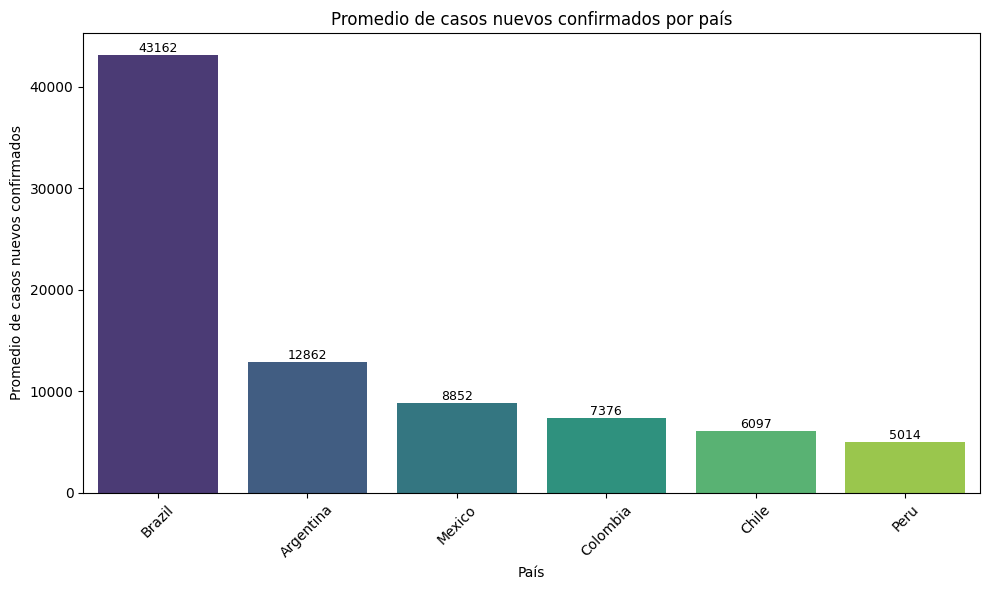

In [17]:
try:
    df_byogenesis
except NameError:
    print('df_byogenesis no está definido. Ejecuta primero la celda que carga el CSV.')
else:
    if 'new_confirmed' not in df_byogenesis.columns or 'country_name' not in df_byogenesis.columns:
        print('Las columnas necesarias no existen en el DataFrame.')
    else:
        # Calculo el promedio de new_confirmed por país y lo ordeno de mayor a menor
        promedio_por_pais = df_byogenesis.groupby('country_name')['new_confirmed'].mean().sort_values(ascending=False)
        plt.figure(figsize=(10,6))
        # Crear el gráfico de barras
        ax = sns.barplot(x=promedio_por_pais.index, y=promedio_por_pais.values, palette='viridis')
        # Agrego título para el gráfico y etiquetas a los ejes
        plt.title('Promedio de casos nuevos confirmados por país')
        plt.xlabel('País')
        plt.ylabel('Promedio de casos nuevos confirmados')
        plt.xticks(rotation=45)
        # Agregar etiquetas a cada barra
        for i, v in enumerate(promedio_por_pais.values):
            ax.text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=9)
        plt.tight_layout()
        # Mostrar el gráfico
        plt.show()

Comparación entre casos confirmados por país, densidad poblacional y promedio de vacunas administradas

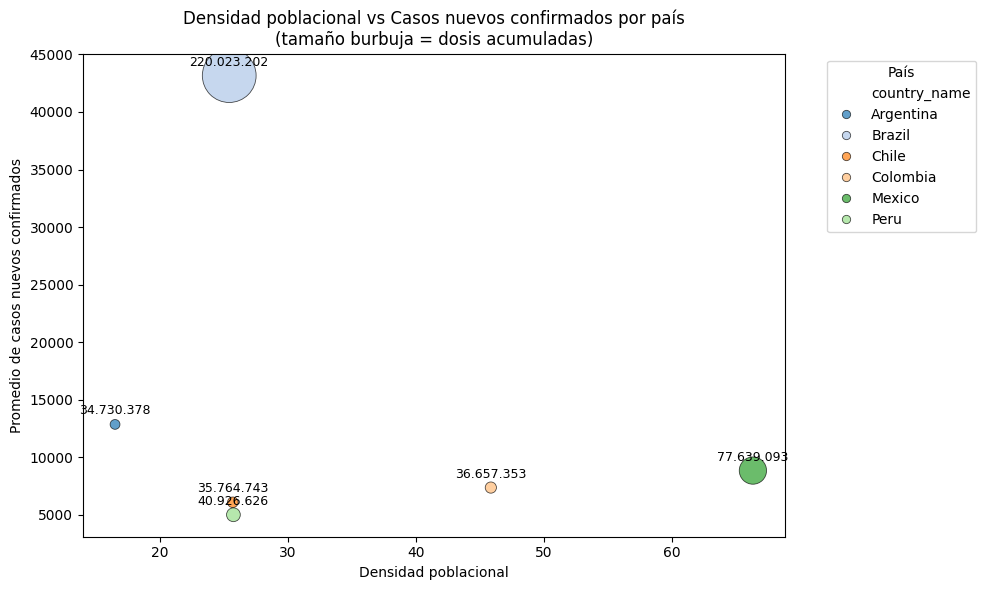

In [18]:
try:
    df_byogenesis
except NameError:
    print('df_byogenesis no está definido. Ejecuta primero la celda que carga el CSV.')
else:
    required_cols = [
        'country_name',
        'population_density',
        'new_confirmed',
        'cumulative_vaccine_doses_administered'
    ]
    if not all(col in df_byogenesis.columns for col in required_cols):
        print('Faltan columnas necesarias en el DataFrame:', 
              [col for col in required_cols if col not in df_byogenesis.columns])
    else:
        # Calcular promedios por país
        df_comp = df_byogenesis.groupby('country_name', as_index=False).agg({
            'new_confirmed': 'mean',
            'population_density': 'mean',
            'cumulative_vaccine_doses_administered': 'mean'
        })

        # Renombrar columnas
        df_comp.rename(columns={
            'new_confirmed': 'Promedio casos nuevos confirmados',
            'population_density': 'Densidad poblacional',
            'cumulative_vaccine_doses_administered': 'Promedio dosis acumuladas'
        }, inplace=True)

        # Escalar tamaño de burbujas
        df_comp['Tamaño burbuja'] = (
            df_comp['Promedio dosis acumuladas'] / df_comp['Promedio dosis acumuladas'].max() * 1500
        )

        plt.figure(figsize=(10, 6))

        # Gráfico de dispersión
        ax = sns.scatterplot(
            x='Densidad poblacional',
            y='Promedio casos nuevos confirmados',
            size='Tamaño burbuja',
            hue='country_name',
            data=df_comp,
            palette='tab20',
            sizes=(50, 1500),
            alpha=0.7,
            edgecolor='black',
            legend='full'
        )

        # Quitar la leyenda del tamaño de burbujas (solo dejar la de países)
        handles, labels = ax.get_legend_handles_labels()
        # Encontrar el índice donde empieza la leyenda de tamaño
        if "Tamaño burbuja" in labels:
            size_index = labels.index("Tamaño burbuja")
            handles = handles[:size_index]
            labels = labels[:size_index]
        ax.legend(handles, labels, title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Agregar etiquetas con las dosis acumuladas
        for i, row in df_comp.iterrows():
            plt.text(
                row['Densidad poblacional'],
                row['Promedio casos nuevos confirmados'] + 0.02 * df_comp['Promedio casos nuevos confirmados'].max(),
                f"{int(row['Promedio dosis acumuladas']):,}".replace(',', '.'),
                fontsize=9,
                ha='center'
            )

        plt.title('Densidad poblacional vs Casos nuevos confirmados por país\n(tamaño burbuja = dosis acumuladas)')
        plt.xlabel('Densidad poblacional')
        plt.ylabel('Promedio de casos nuevos confirmados')
        plt.tight_layout()
        plt.show()


Correlación entre nuevos casos confirmados, aumento de las muertes y aumento de la población a lo largo del tiempo

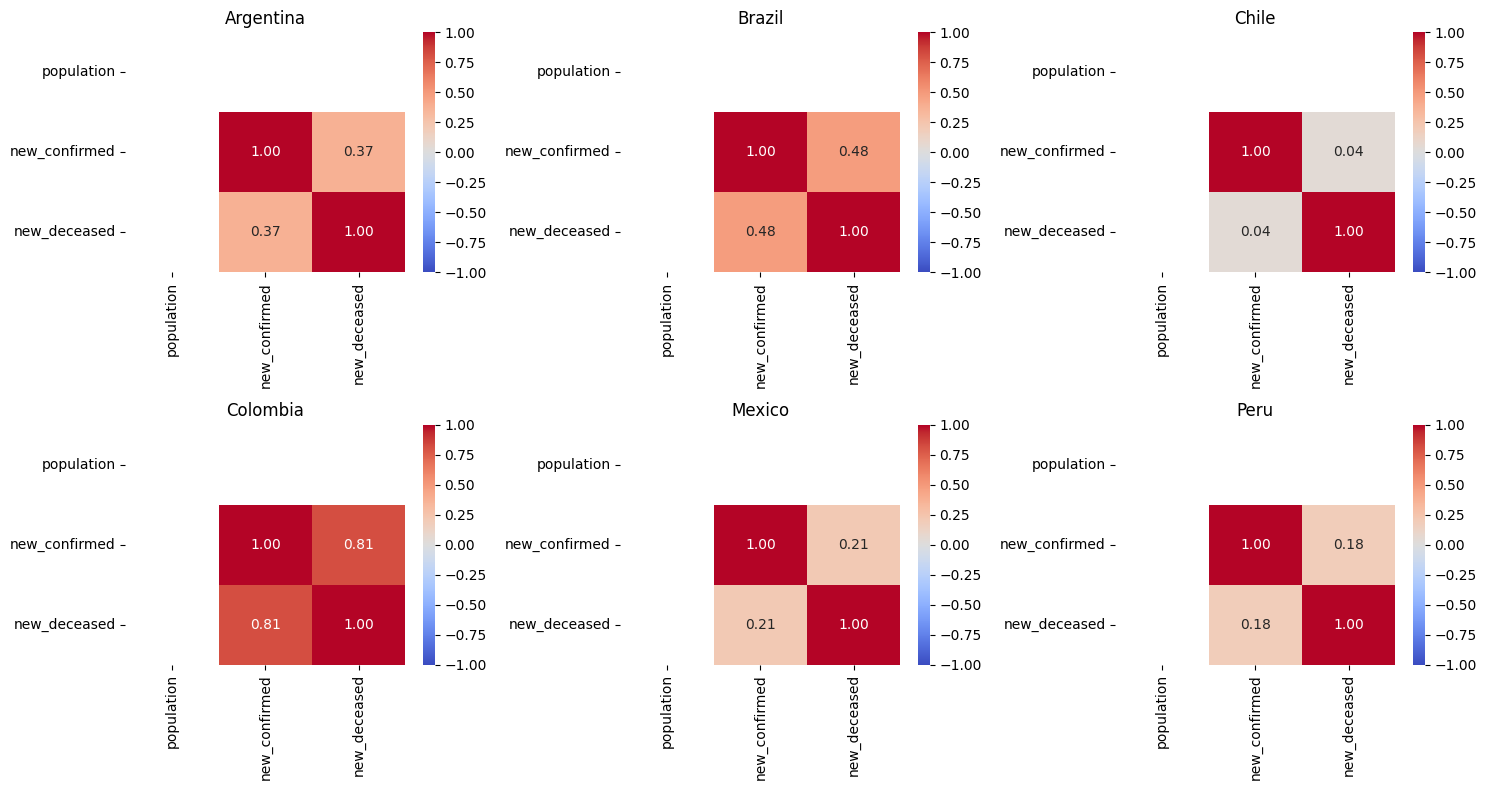

In [19]:
paises = df_byogenesis['country_name'].unique()
num_paises = len(paises)

# Definir número de filas y columnas para los subplots
cols = 3  # podés cambiar a 2 o 4 según convenga
rows = (num_paises + cols - 1) // cols  # ceil para que alcance para todos los países

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()  # para iterar fácilmente aunque haya más de una fila

for i, pais in enumerate(paises):
    df_pais = df_byogenesis[df_byogenesis['country_name'] == pais]
    df_corr = df_pais[['population', 'new_confirmed', 'new_deceased']].corr()
    
    sns.heatmap(
        df_corr,
        annot=True,
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
        fmt=".2f",
        ax=axes[i]  # asignar a cada subplot
    )
    axes[i].set_title(f'{pais}')

# Eliminar ejes sobrantes si hay más subplots que países
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Comparación de la estructura sanitaria del país

C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\1828893486.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


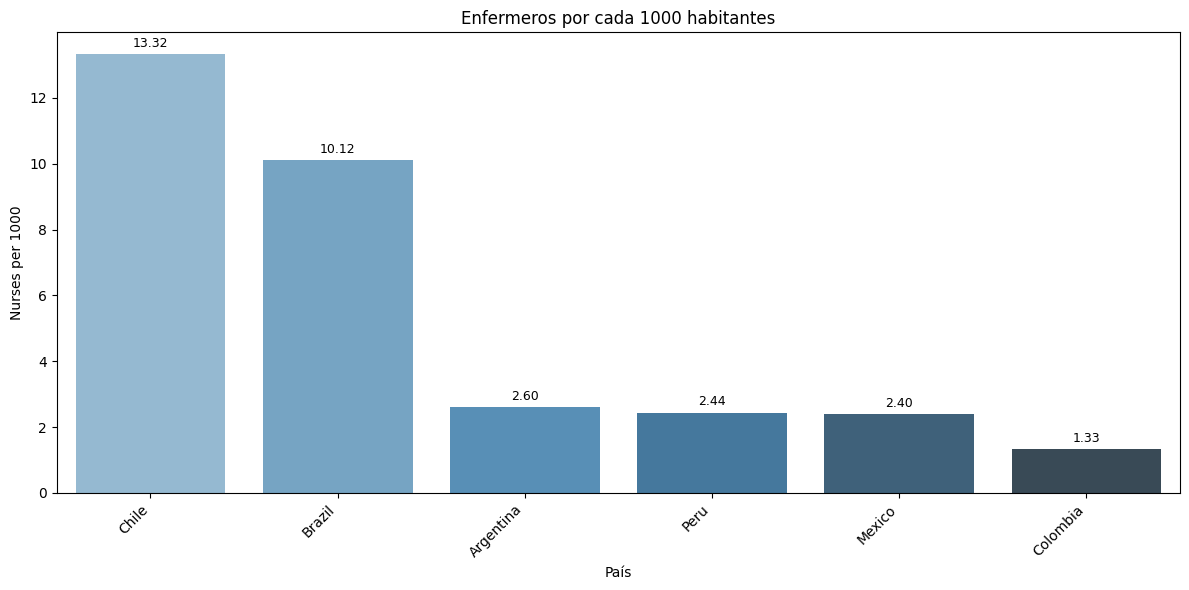

In [20]:
# Agrupar por país y calcular el promedio de nurses_per_1000
df_nurses = (
    df_byogenesis
    .groupby('country_name', as_index=False)['nurses_per_1000']
    .mean()
    .sort_values('nurses_per_1000', ascending=False)
)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_nurses,
    x='country_name',
    y='nurses_per_1000',
    palette='Blues_d'
)

# Agregar etiquetas encima de cada barra (formato con 2 decimales)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.2f}',
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),                # desplazamiento en puntos
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=9
    )

ax.set_title('Enfermeros por cada 1000 habitantes')
ax.set_xlabel('País')
ax.set_ylabel('Nurses per 1000')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\2029242313.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


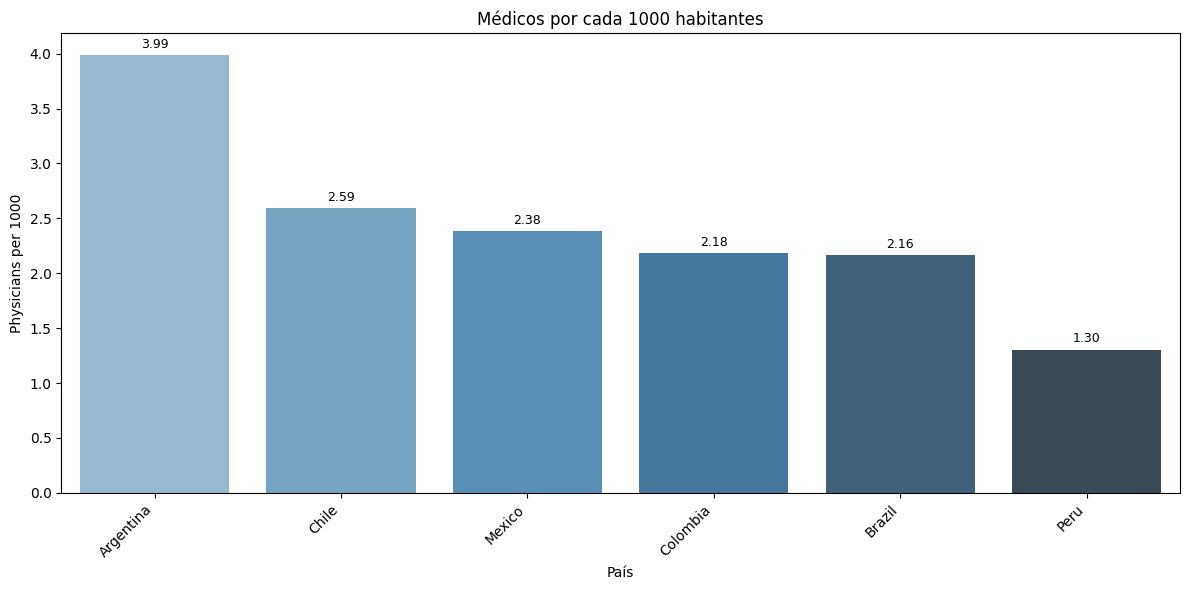

In [21]:
# Agrupar por país y calcular el promedio de physicians_per_1000
df_physicians = (
    df_byogenesis
    .groupby('country_name', as_index=False)['physicians_per_1000']
    .mean()
    .sort_values('physicians_per_1000', ascending=False)
)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_physicians,
    x='country_name',
    y='physicians_per_1000',
    palette='Blues_d'
)

# Agregar etiquetas encima de cada barra (formato con 2 decimales)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.2f}',
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),                # desplazamiento en puntos
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=9
    )

ax.set_title('Médicos por cada 1000 habitantes')
ax.set_xlabel('País')
ax.set_ylabel('Physicians per 1000')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comparación del porcentaje de mortalidad femenina y masculina

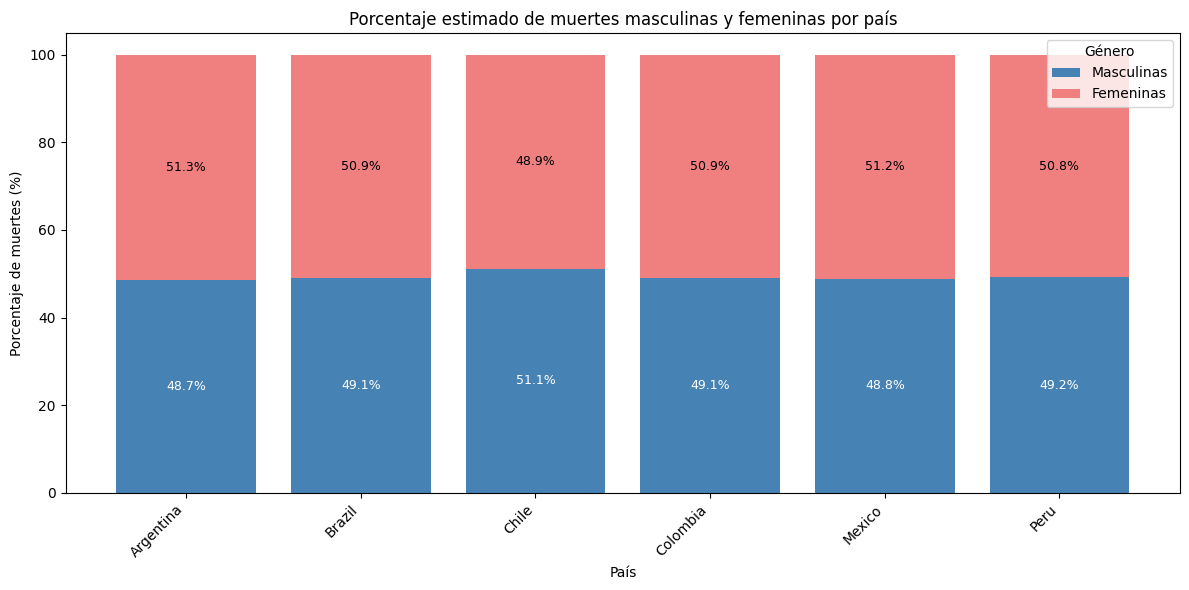

In [22]:
# Agrupar por país 
df_mortalidad = df_byogenesis.groupby('country_name', as_index=False).agg({
    'population': 'mean',
    'population_male': 'mean',
    'population_female': 'mean',
    'new_deceased': 'sum'
})

# Calcular muertes estimadas por género (proporcionales al tamaño poblacional)
df_mortalidad['muertes_masculinas'] = (
    df_mortalidad['new_deceased'] * (df_mortalidad['population_male'] / df_mortalidad['population'])
)
df_mortalidad['muertes_femeninas'] = (
    df_mortalidad['new_deceased'] * (df_mortalidad['population_female'] / df_mortalidad['population'])
)

# Calcular el total de muertes (para normalizar)
df_mortalidad['total_muertes_estimadas'] = (
    df_mortalidad['muertes_masculinas'] + df_mortalidad['muertes_femeninas']
)

# Calcular porcentajes de muertes por género
df_mortalidad['pct_masculinas'] = (
    df_mortalidad['muertes_masculinas'] / df_mortalidad['total_muertes_estimadas'] * 100
)
df_mortalidad['pct_femeninas'] = (
    df_mortalidad['muertes_femeninas'] / df_mortalidad['total_muertes_estimadas'] * 100
)

# Crear gráfico de barras apiladas al 100 %
plt.figure(figsize=(12, 6))
bars_male = plt.bar(df_mortalidad['country_name'], df_mortalidad['pct_masculinas'],
                    label='Masculinas', color='steelblue')
bars_female = plt.bar(df_mortalidad['country_name'], df_mortalidad['pct_femeninas'],
                      bottom=df_mortalidad['pct_masculinas'], label='Femeninas', color='lightcoral')

# Agregar etiquetas de porcentaje sobre cada segmento
for bar_m, bar_f, pct_m, pct_f in zip(bars_male, bars_female,
                                      df_mortalidad['pct_masculinas'],
                                      df_mortalidad['pct_femeninas']):
    # Etiqueta hombres
    plt.text(bar_m.get_x() + bar_m.get_width()/2, bar_m.get_height()/2,
             f"{pct_m:.1f}%", ha='center', va='center', color='white', fontsize=9)
    # Etiqueta mujeres
    plt.text(bar_f.get_x() + bar_f.get_width()/2,
             bar_m.get_height() + bar_f.get_height()/2,
             f"{pct_f:.1f}%", ha='center', va='center', color='black', fontsize=9)

plt.title('Porcentaje estimado de muertes masculinas y femeninas por país')
plt.xlabel('País')
plt.ylabel('Porcentaje de muertes (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

Identificación de Tendencias y Patrones

Evolución de dosis administradas por mes de cada país

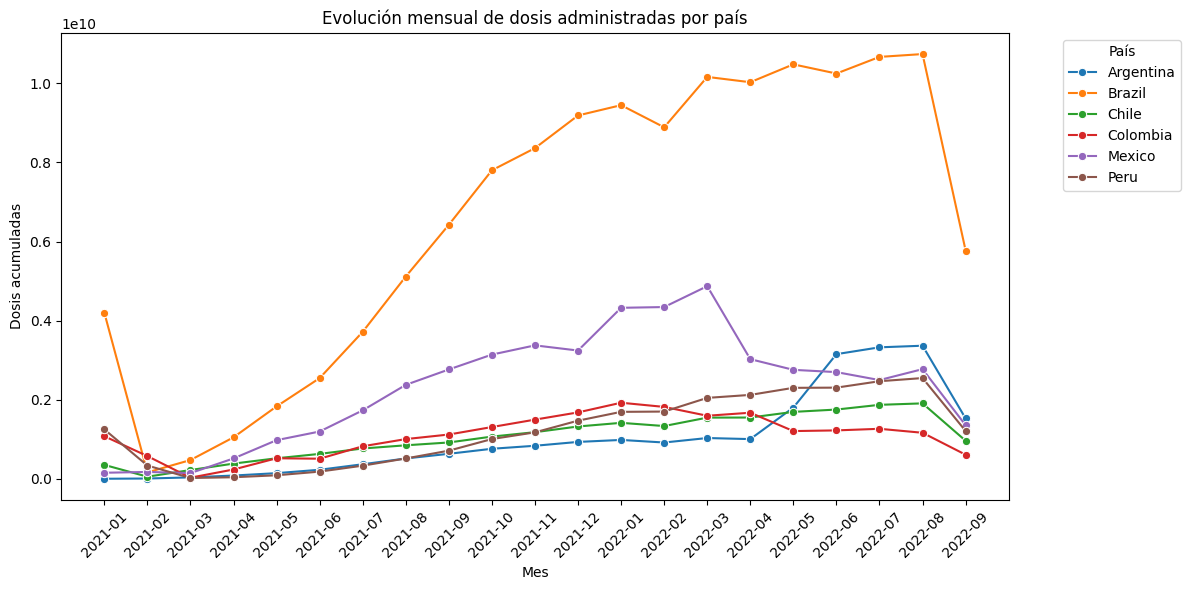

In [23]:
# Asegurarse de que la columna de fecha esté en formato datetime
df_byogenesis['date'] = pd.to_datetime(df_byogenesis['date'])

# Crear una columna con el mes (año-mes)
df_byogenesis['month'] = df_byogenesis['date'].dt.to_period('M').astype(str)

# Calcular el promedio (o suma, según el caso) de dosis administradas por mes y país
df_monthly = (
    df_byogenesis
    .groupby(['country_name', 'month'])['cumulative_vaccine_doses_administered']
    .sum()
    .reset_index()
)

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_monthly,
    x='month',
    y='cumulative_vaccine_doses_administered',
    hue='country_name',
    marker='o'
)

plt.title('Evolución mensual de dosis administradas por país')
plt.xlabel('Mes')
plt.ylabel('Dosis acumuladas')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

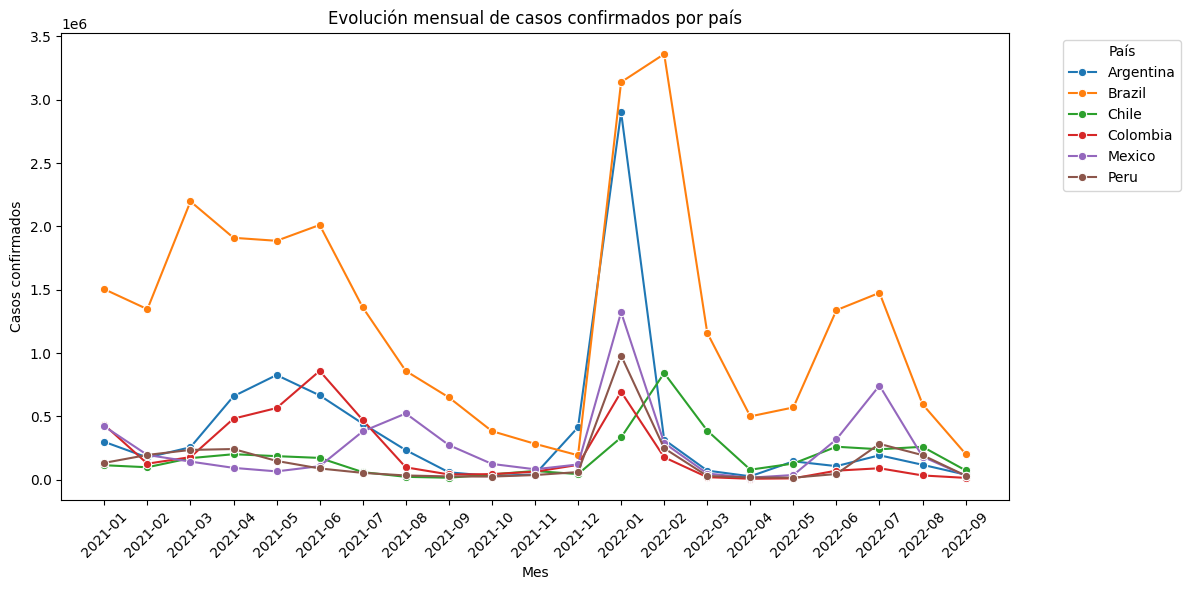

In [24]:
# Asegurarse de que la columna de fecha esté en formato datetime
df_byogenesis['date'] = pd.to_datetime(df_byogenesis['date'])

# Crear una columna con el mes (año-mes)
df_byogenesis['month'] = df_byogenesis['date'].dt.to_period('M').astype(str)

# Calcular el promedio (o suma, según el caso) de dosis administradas por mes y país
df_monthly = (
    df_byogenesis
    .groupby(['country_name', 'month'])['new_confirmed']
    .sum()
    .reset_index()
)

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_monthly,
    x='month',
    y='new_confirmed',
    hue='country_name',
    marker='o'
)

plt.title('Evolución mensual de casos confirmados por país')
plt.xlabel('Mes')
plt.ylabel('Casos confirmados')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Casos nuevos vs. temperatura promedio

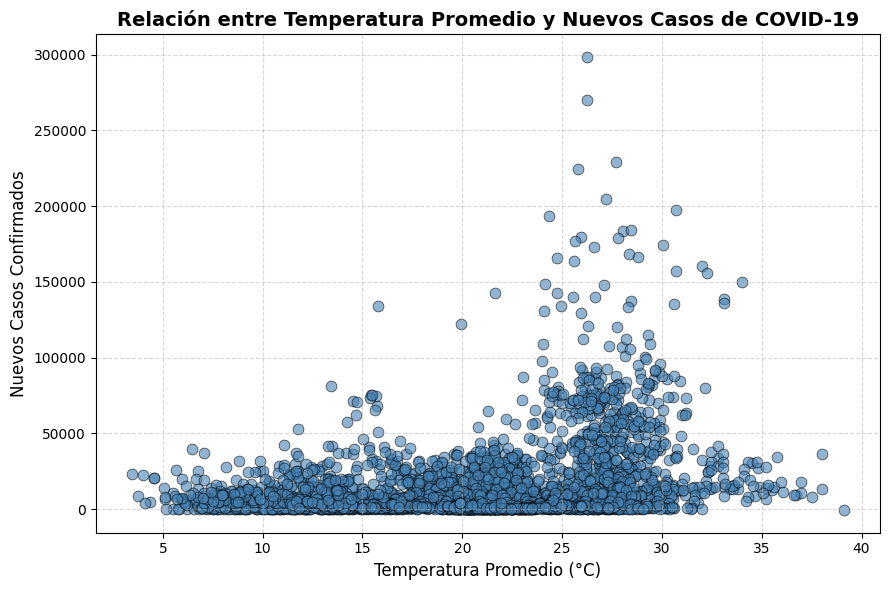

In [25]:
plt.figure(figsize=(9,6))  # Tamaño del gráfico

# Diagrama de dispersión simple
sns.scatterplot(
    data=df_byogenesis,
    x='average_temperature_celsius',                # Eje X: temperatura promedio
    y='new_confirmed',                  # Eje Y: nuevos casos confirmados
    color='steelblue',                  # Color uniforme
    alpha=0.6,                          # Transparencia para ver concentración de puntos
    s=60,                               # Tamaño de los puntos
    edgecolor='black'                   # Borde negro para contraste
)

# Título y etiquetas
plt.title('Relación entre Temperatura Promedio y Nuevos Casos de COVID-19', fontsize=14, weight='bold')
plt.xlabel('Temperatura Promedio (°C)', fontsize=12)
plt.ylabel('Nuevos Casos Confirmados', fontsize=12)

# Cuadrícula y formato general
plt.grid(True, linestyle='--', alpha=0.5)  # Cuadrícula suave
plt.tight_layout()                         # Ajusta los márgenes automáticamente

# Mostrar gráfico
plt.show()


Infraestructura médica vs. mortalidad

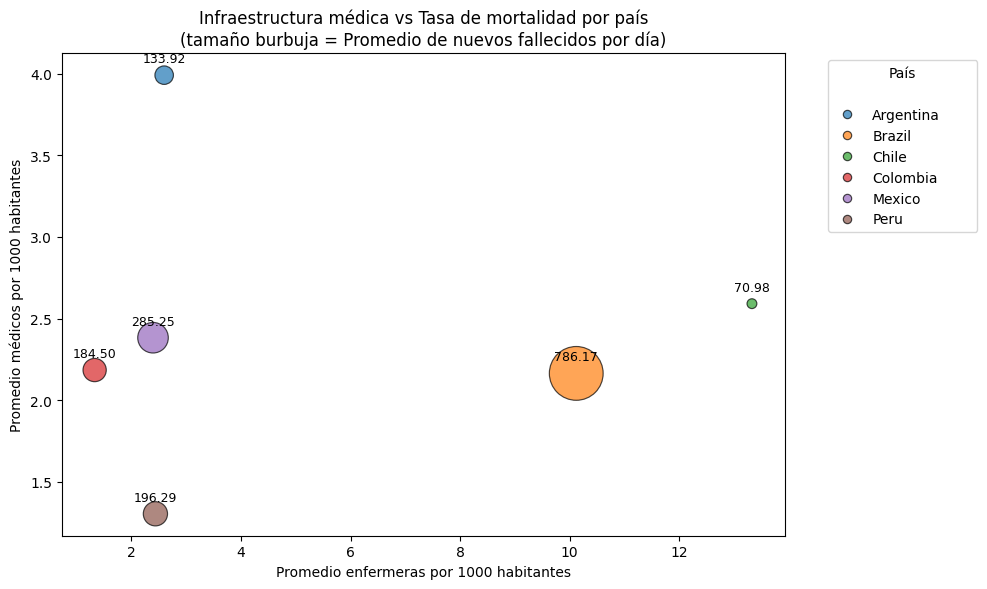

In [26]:
try:
    df_byogenesis
except NameError:
    print('df_byogenesis no está definido. Ejecuta primero la celda que carga el CSV.')
else:
    required_cols = [
        'country_name',
        'nurses_per_1000',
        'physicians_per_1000',
        'new_deceased'
    ]
    if not all(col in df_byogenesis.columns for col in required_cols):
        print('Faltan columnas necesarias en el DataFrame:', 
              [col for col in required_cols if col not in df_byogenesis.columns])
    else:
        # Calcular promedios por país
        df_comp = df_byogenesis.groupby('country_name', as_index=False).agg({
            'nurses_per_1000': 'mean',
            'physicians_per_1000': 'mean',
            'new_deceased': 'mean'
        })

        # Renombrar columnas
        df_comp.rename(columns={
            'nurses_per_1000': 'Promedio enfermeras por 1000 habitantes',
            'physicians_per_1000': 'Promedio médicos por 1000 habitantes',
            'new_deceased': 'Promedio de nuevos fallecidos por día'
        }, inplace=True)

        # Escalar tamaño de burbujas
        df_comp['Tamaño burbuja'] = (
            df_comp['Promedio de nuevos fallecidos por día'] / df_comp['Promedio de nuevos fallecidos por día'].max() * 1500
        )

        plt.figure(figsize=(10, 6))

        # Gráfico de dispersión
        ax = sns.scatterplot(
            x='Promedio enfermeras por 1000 habitantes',
            y='Promedio médicos por 1000 habitantes',
            size='Tamaño burbuja',
            hue='country_name',
            data=df_comp,
            palette = {
                'Argentina': '#1f77b4',
                'Brazil': '#ff7f0e',
                'Chile': '#2ca02c',
                'Colombia': '#d62728',
                'Mexico': '#9467bd',
                'Peru': '#8c564b'
            },
            sizes=(50, 1500),
            alpha=0.7,
            edgecolor='black',
            legend='full'
        )

        # Quitar la leyenda del tamaño de burbujas (solo dejar la de países)
        handles, labels = ax.get_legend_handles_labels()
        # Encontrar el índice donde empieza la leyenda de tamaño
        if "Tamaño burbuja" in labels:
            size_index = labels.index("Tamaño burbuja")
            handles = handles[:size_index]
            labels = labels[:size_index]
        ax.legend(handles, labels, title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
        # Eliminar el texto "country_name" que aparece debajo del título de la leyenda
        legend = ax.get_legend()
        if legend:
            for text in legend.texts:
                if text.get_text() == "country_name":
                    text.set_visible(False)


        # Agregar etiquetas con las dosis acumuladas
        for i, row in df_comp.iterrows():
            plt.text(
                row['Promedio enfermeras por 1000 habitantes'],
                row['Promedio médicos por 1000 habitantes'] + 0.02 * df_comp['Promedio médicos por 1000 habitantes'].max(),
                f"{row['Promedio de nuevos fallecidos por día']:.2f}",
                fontsize=9,
                ha='center'
            )


        plt.title('Infraestructura médica vs Tasa de mortalidad por país\n(tamaño burbuja = Promedio de nuevos fallecidos por día)')
        plt.xlabel('Promedio enfermeras por 1000 habitantes')
        plt.ylabel('Promedio médicos por 1000 habitantes')
        plt.tight_layout()
        plt.show()

Relación entre infraestructura médica y dosis administradas

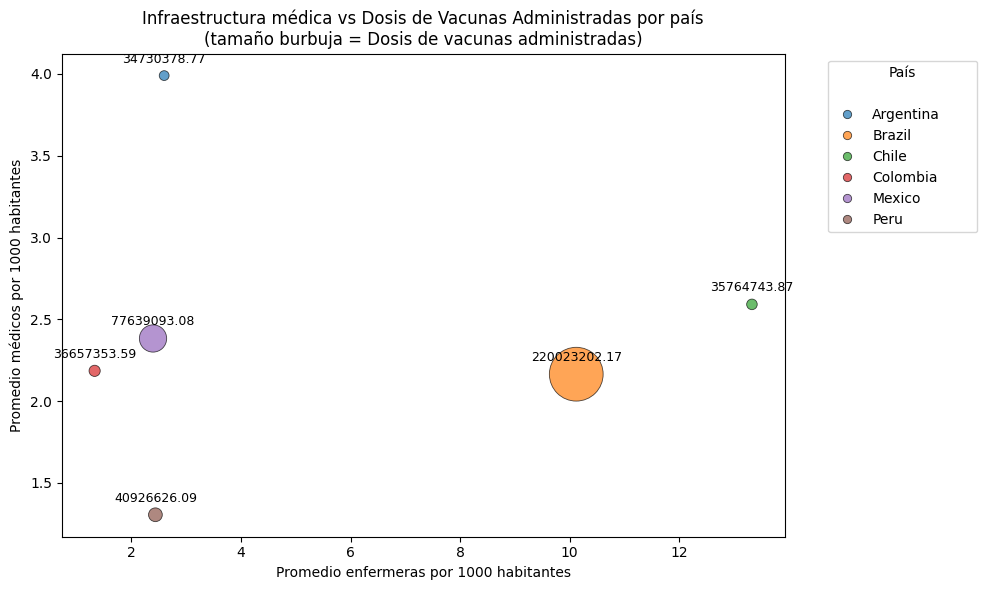

In [27]:
try:
    df_byogenesis
except NameError:
    print('df_byogenesis no está definido. Ejecuta primero la celda que carga el CSV.')
else:
    required_cols = [
        'country_name',
        'nurses_per_1000',
        'physicians_per_1000',
        'cumulative_vaccine_doses_administered'
    ]
    if not all(col in df_byogenesis.columns for col in required_cols):
        print('Faltan columnas necesarias en el DataFrame:', 
              [col for col in required_cols if col not in df_byogenesis.columns])
    else:
        # Calcular promedios por país
        df_comp = df_byogenesis.groupby('country_name', as_index=False).agg({
            'nurses_per_1000': 'mean',
            'physicians_per_1000': 'mean',
            'cumulative_vaccine_doses_administered': 'mean'
        })

        # Renombrar columnas
        df_comp.rename(columns={
            'nurses_per_1000': 'Promedio enfermeras por 1000 habitantes',
            'physicians_per_1000': 'Promedio médicos por 1000 habitantes',
            'cumulative_vaccine_doses_administered': 'Promedio de dosis de vacunas administradas'
        }, inplace=True)

        # Escalar tamaño de burbujas
        df_comp['Tamaño burbuja'] = (
            df_comp['Promedio de dosis de vacunas administradas'] / df_comp['Promedio de dosis de vacunas administradas'].max() * 1500
        )

        plt.figure(figsize=(10, 6))

        # Gráfico de dispersión
        ax = sns.scatterplot(
            x='Promedio enfermeras por 1000 habitantes',
            y='Promedio médicos por 1000 habitantes',
            size='Tamaño burbuja',
            hue='country_name',
            data=df_comp,
            palette = {
                'Argentina': '#1f77b4',
                'Brazil': '#ff7f0e',
                'Chile': '#2ca02c',
                'Colombia': '#d62728',
                'Mexico': '#9467bd',
                'Peru': '#8c564b'
            },
            sizes=(50, 1500),
            alpha=0.7,
            edgecolor='black',
            legend='full'
        )

        # Quitar la leyenda del tamaño de burbujas (solo dejar la de países)
        handles, labels = ax.get_legend_handles_labels()
        # Encontrar el índice donde empieza la leyenda de tamaño
        if "Tamaño burbuja" in labels:
            size_index = labels.index("Tamaño burbuja")
            handles = handles[:size_index]
            labels = labels[:size_index]
        ax.legend(handles, labels, title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
        # Eliminar el texto "country_name" que aparece debajo del título de la leyenda
        legend = ax.get_legend()
        if legend:
            for text in legend.texts:
                if text.get_text() == "country_name":
                    text.set_visible(False)


        # Agregar etiquetas con las dosis acumuladas
        for i, row in df_comp.iterrows():
            plt.text(
                row['Promedio enfermeras por 1000 habitantes'],
                row['Promedio médicos por 1000 habitantes'] + 0.02 * df_comp['Promedio médicos por 1000 habitantes'].max(),
                f"{row['Promedio de dosis de vacunas administradas']:.2f}",
                fontsize=9,
                ha='center'
            )


        plt.title('Infraestructura médica vs Dosis de Vacunas Administradas por país\n(tamaño burbuja = Dosis de vacunas administradas)')
        plt.xlabel('Promedio enfermeras por 1000 habitantes')
        plt.ylabel('Promedio médicos por 1000 habitantes')
        plt.tight_layout()
        plt.show()

Relación entre vacunación, aumento y recuperación de afectados

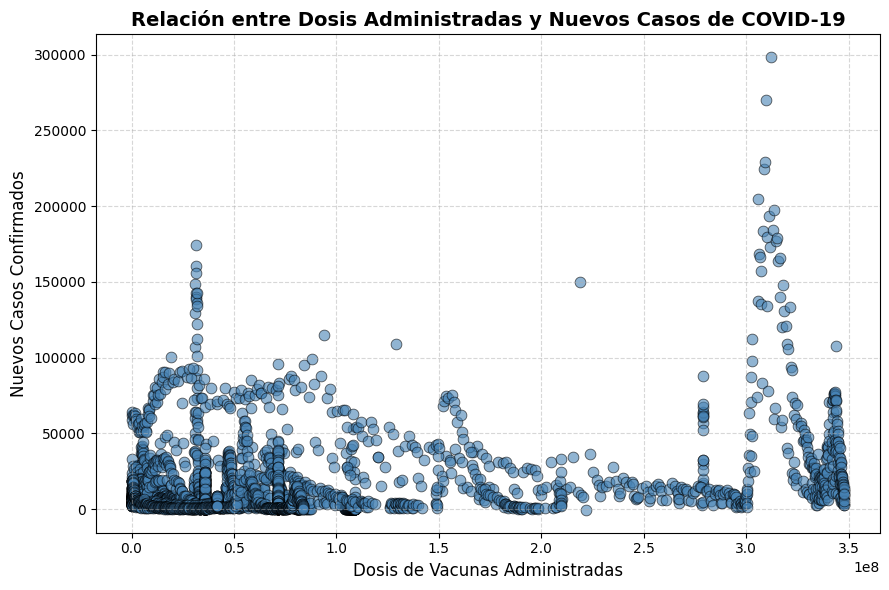

In [28]:
plt.figure(figsize=(9,6))  # Tamaño del gráfico

# Diagrama de dispersión simple
sns.scatterplot(
    data=df_byogenesis,
    x='cumulative_vaccine_doses_administered',                # Eje X: dosis acumuladas de vacuna   
    y='new_confirmed',                  # Eje Y: nuevos casos confirmados
    color='steelblue',                  # Color uniforme
    alpha=0.6,                          # Transparencia para ver concentración de puntos
    s=60,                               # Tamaño de los puntos
    edgecolor='black'                   # Borde negro para contraste
)

# Título y etiquetas
plt.title('Relación entre Dosis Administradas y Nuevos Casos de COVID-19', fontsize=14, weight='bold')
plt.xlabel('Dosis de Vacunas Administradas', fontsize=12)
plt.ylabel('Nuevos Casos Confirmados', fontsize=12)

# Cuadrícula y formato general
plt.grid(True, linestyle='--', alpha=0.5)  # Cuadrícula suave
plt.tight_layout()                         # Ajusta los márgenes automáticamente

# Mostrar gráfico
plt.show()

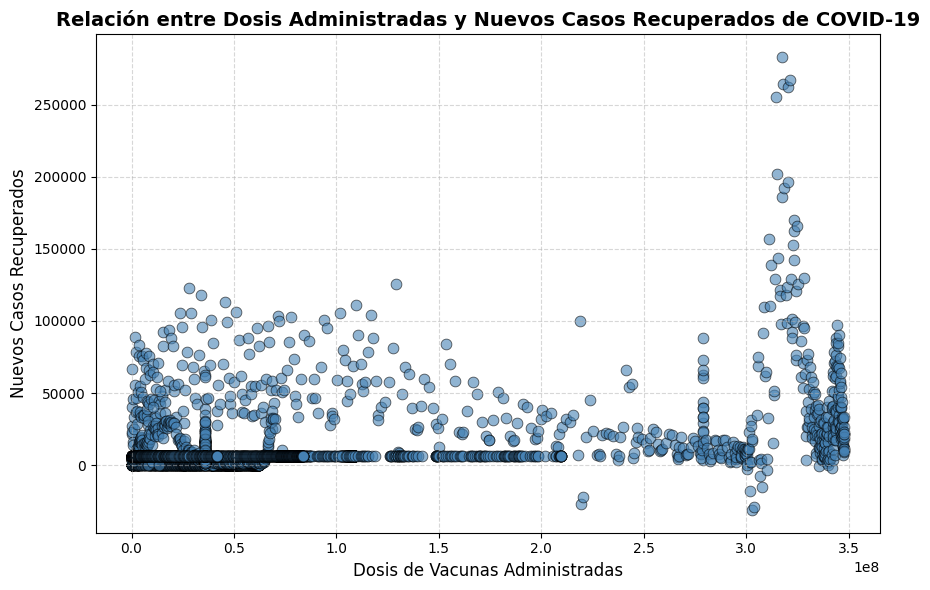

In [29]:
plt.figure(figsize=(9,6))  # Tamaño del gráfico

# Diagrama de dispersión simple
sns.scatterplot(
    data=df_byogenesis,
    x='cumulative_vaccine_doses_administered',                # Eje X: dosis acumuladas de vacuna
    y='new_recovered',                  # Eje Y: nuevos casos recuperados
    color='steelblue',                  # Color uniforme
    alpha=0.6,                          # Transparencia para ver concentración de puntos
    s=60,                               # Tamaño de los puntos
    edgecolor='black'                   # Borde negro para contraste
)

# Título y etiquetas
plt.title('Relación entre Dosis Administradas y Nuevos Casos Recuperados de COVID-19', fontsize=14, weight='bold')
plt.xlabel('Dosis de Vacunas Administradas', fontsize=12)
plt.ylabel('Nuevos Casos Recuperados', fontsize=12)

# Cuadrícula y formato general
plt.grid(True, linestyle='--', alpha=0.5)  # Cuadrícula suave
plt.tight_layout()                         # Ajusta los márgenes automáticamente

# Mostrar gráfico
plt.show()

Correlación entre fallecimientos de COVID-19, fallecimientos por comorbilidad, el porcentaje población preponderante a la diabetes y el porcentaje de fumadores en la población

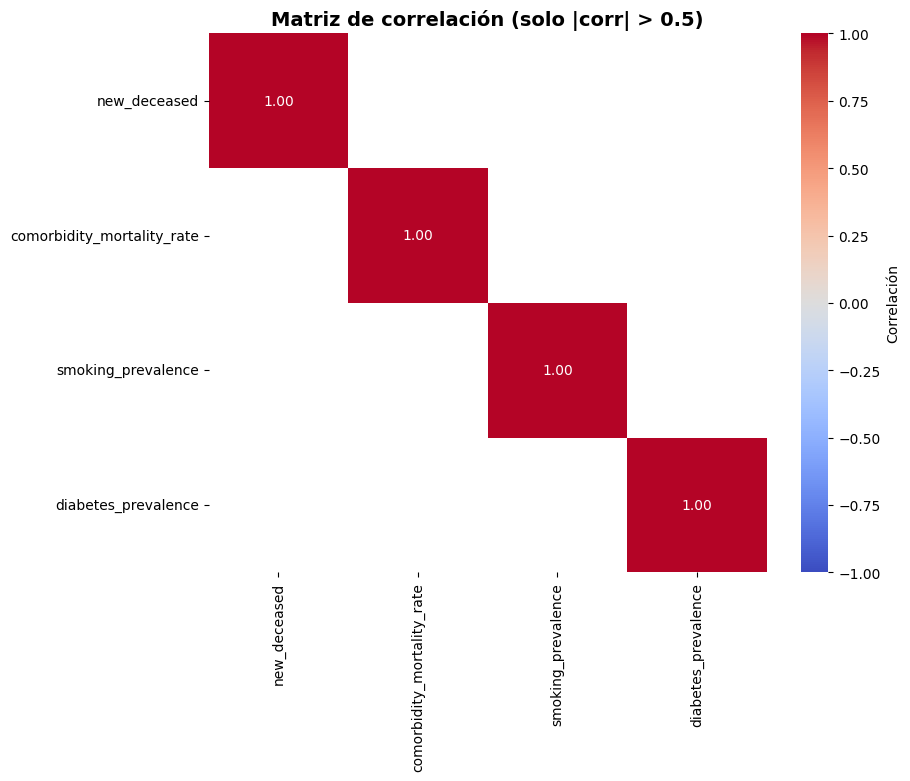

In [30]:
cols = ['new_deceased', 'comorbidity_mortality_rate', 'smoking_prevalence', 'diabetes_prevalence']
corr = df_byogenesis[cols].corr()

# Crear máscara para valores que no cumplen |corr| > 0.5
mask = np.abs(corr) <= 0.5

plt.figure(figsize=(9,7))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    mask=mask,           # Aplicar máscara
    cbar_kws={'label': 'Correlación'}  # Etiqueta para la barra de colores
)
plt.title('Matriz de correlación (solo |corr| > 0.5)', fontsize=14, weight='bold')
plt.show()

AVANCE N°3

Importo las librerías necesarias

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets

Leo el dataset con los datos limpios y filtrados

In [ ]:
#Esta es la ubicación del archivo CSV en mi computadora
csv_path = 'C:/Users/FranciscoJH/Downloads/DatosFinalesFiltrado.csv' #Se debe cambiar la ruta si es necesario
try:
    df_byogenesis = pd.read_csv(csv_path)
    print('Archivo leído correctamente.')
    display(df_byogenesis.head())
except FileNotFoundError:
    print('Error al leer el CSV. Verifica la ruta del archivo.')

Archivo leído correctamente.


,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,6418.0,6098652.5
1,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,6418.0,6098652.5
2,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,6418.0,6098652.5
3,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,6418.0,6098652.5
4,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,6418.0,6098652.5


Análisis Temporal

Tasa de cambio de casos cofirmados en general

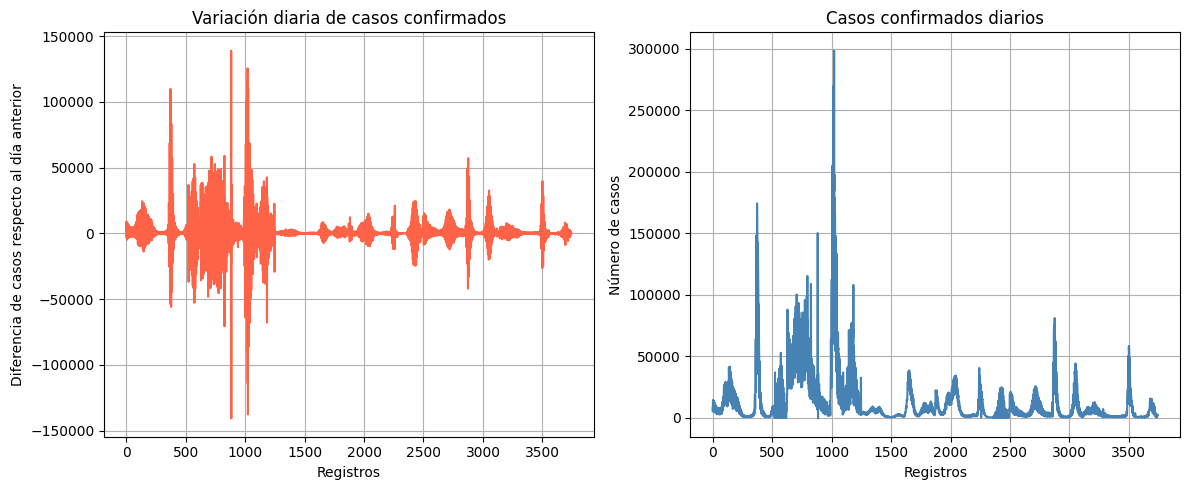

In [33]:
plt.figure(figsize=(12,5))

# --- Gráfico 1: Diferencia diaria de casos (variación) ---
plt.subplot(1, 2, 1)
df_byogenesis['new_confirmed'].diff().plot(color='tomato')
plt.title('Variación diaria de casos confirmados')
plt.xlabel('Registros')
plt.ylabel('Diferencia de casos respecto al día anterior')
plt.grid(True)

# --- Gráfico 2: Casos confirmados diarios ---
plt.subplot(1, 2, 2)
df_byogenesis['new_confirmed'].plot(color='steelblue')
plt.title('Casos confirmados diarios')
plt.xlabel('Registros')
plt.ylabel('Número de casos')
plt.grid(True)

plt.tight_layout()
plt.show()

Tasa de cambio de fallecidos en general

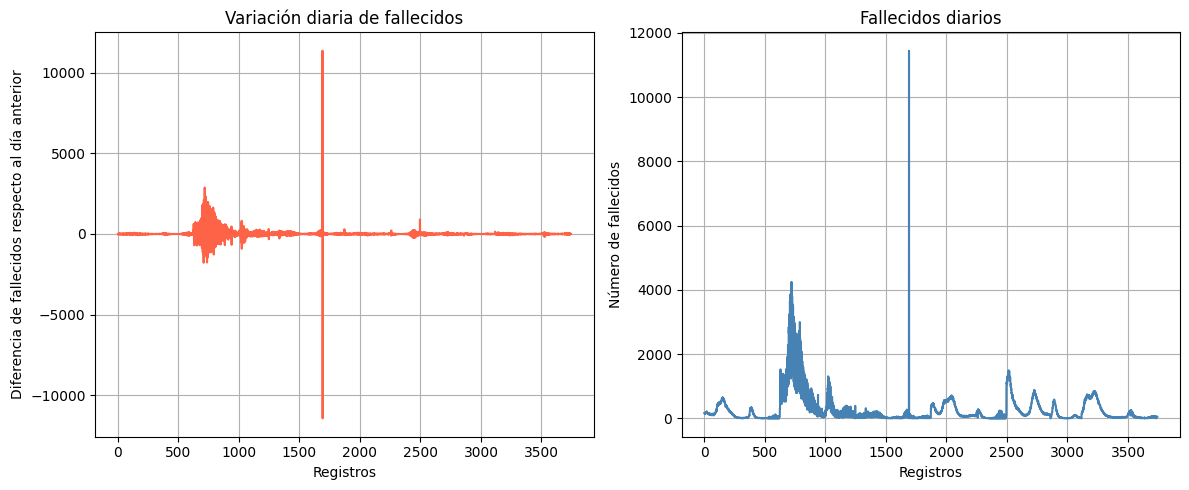

In [34]:
plt.figure(figsize=(12,5))

# --- Gráfico 1: Diferencia diaria de casos (variación) ---
plt.subplot(1, 2, 1)
df_byogenesis['new_deceased'].diff().plot(color='tomato')
plt.title('Variación diaria de fallecidos')
plt.xlabel('Registros')
plt.ylabel('Diferencia de fallecidos respecto al día anterior')
plt.grid(True)

# --- Gráfico 2: Casos confirmados diarios ---
plt.subplot(1, 2, 2)
df_byogenesis['new_deceased'].plot(color='steelblue')
plt.title('Fallecidos diarios')
plt.xlabel('Registros')
plt.ylabel('Número de fallecidos')
plt.grid(True)

plt.tight_layout()
plt.show()

Promedio movil de casos y muertes

In [35]:
#Primero creo una función que calcula el promedio móvil de una columna dada
def promedio_movil(df, columna, ventana=7):
    """
    Parámetros:
        df: DataFrame
        columna: str -> nombre de la columna a suavizar
        ventana: int -> tamaño de la ventana (por defecto 7 días)
    Devuelve:
        Serie con el promedio móvil
    """
    return df[columna].rolling(window=ventana, min_periods=1).mean()

In [36]:
# Asegurar que 'date' sea tipo fecha
df_byogenesis['date'] = pd.to_datetime(df_byogenesis['date'])

# Ordenar para el cálculo correcto del promedio móvil
df_byogenesis = df_byogenesis.sort_values(by=['country_name', 'date'])

# Aplicar función a cada país
df_byogenesis['pm_casos'] = df_byogenesis.groupby('country_name').apply(lambda x: promedio_movil(x, 'new_confirmed')).reset_index(level=0, drop=True)
df_byogenesis['pm_muertes'] = df_byogenesis.groupby('country_name').apply(lambda x: promedio_movil(x, 'new_deceased')).reset_index(level=0, drop=True)


C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\2410588379.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_byogenesis['pm_casos'] = df_byogenesis.groupby('country_name').apply(lambda x: promedio_movil(x, 'new_confirmed')).reset_index(level=0, drop=True)
C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\2410588379.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_byogenesis['pm_muertes'] = df

Promedio movil de casos confirmados en cada país

C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\2728825338.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


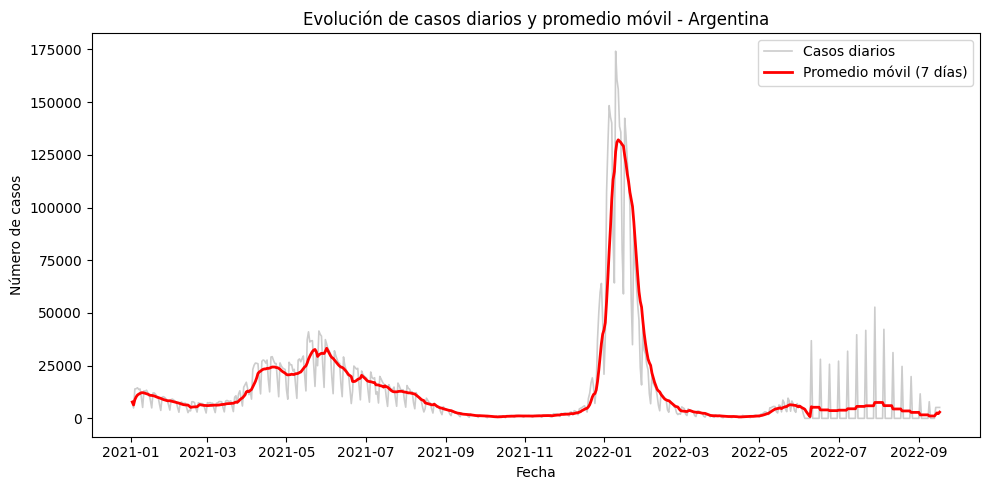

In [37]:
pais = 'Argentina'
df_pais = df_byogenesis[df_byogenesis['country_name'] == pais]

plt.figure(figsize=(10,5))

# Serie diaria original
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='new_confirmed', 
    label='Casos diarios', 
    alpha=0.4, 
    linewidth=1.2,
    color='gray'
)

# Promedio móvil
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='pm_casos', 
    label='Promedio móvil (7 días)',
    color='red',
    linewidth=2,
    ci=None  # Quitar banda de confianza (error bars)
)

plt.title(f'Evolución de casos diarios y promedio móvil - {pais}')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\991462419.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


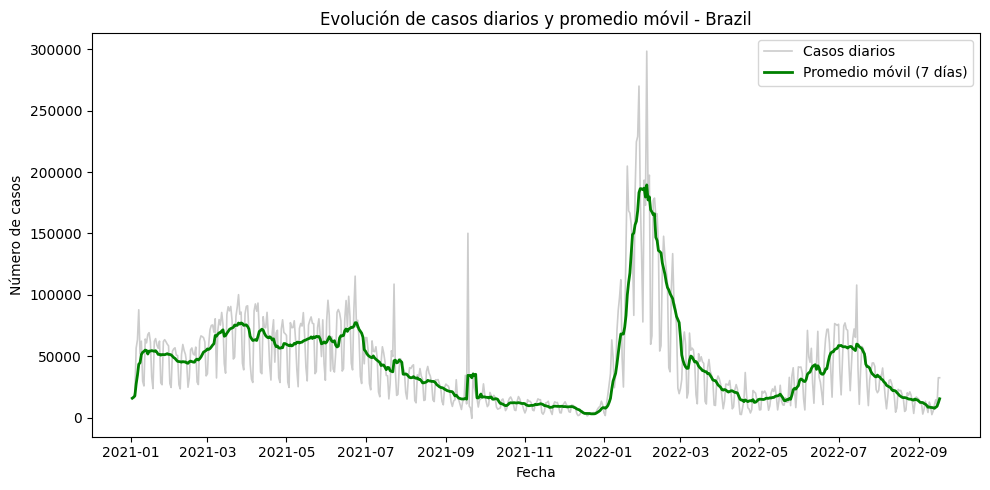

In [38]:
pais = 'Brazil'
df_pais = df_byogenesis[df_byogenesis['country_name'] == pais]

plt.figure(figsize=(10,5))

# Serie diaria original
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='new_confirmed', 
    label='Casos diarios', 
    alpha=0.4, 
    linewidth=1.2,
    color='gray'
)

# Promedio móvil
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='pm_casos', 
    label='Promedio móvil (7 días)',
    color='green',
    linewidth=2,
    ci=None  # Quitar banda de confianza (error bars)
)

plt.title(f'Evolución de casos diarios y promedio móvil - {pais}')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\942084680.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


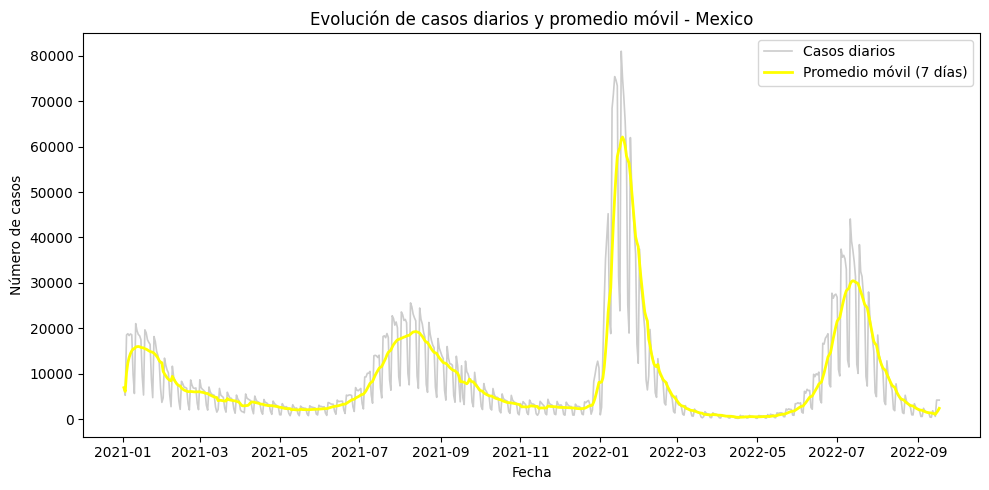

In [39]:
pais = 'Mexico'
df_pais = df_byogenesis[df_byogenesis['country_name'] == pais]

plt.figure(figsize=(10,5))

# Serie diaria original
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='new_confirmed', 
    label='Casos diarios', 
    alpha=0.4, 
    linewidth=1.2,
    color='gray'
)

# Promedio móvil
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='pm_casos', 
    label='Promedio móvil (7 días)',
    color='yellow',
    linewidth=2,
    ci=None  # Quitar banda de confianza (error bars)
)

plt.title(f'Evolución de casos diarios y promedio móvil - {pais}')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\2264629174.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


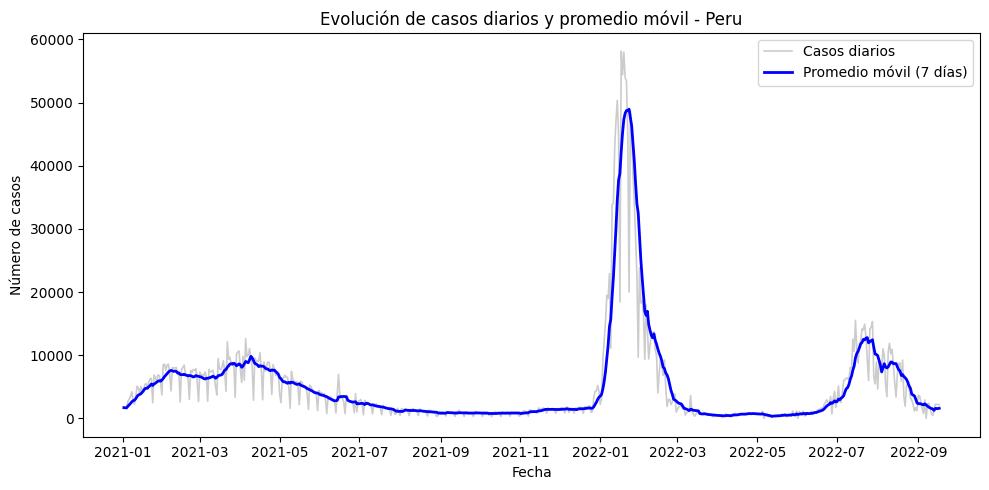

In [40]:
pais = 'Peru'
df_pais = df_byogenesis[df_byogenesis['country_name'] == pais]

plt.figure(figsize=(10,5))

# Serie diaria original
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='new_confirmed', 
    label='Casos diarios', 
    alpha=0.4, 
    linewidth=1.2,
    color='gray'
)

# Promedio móvil
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='pm_casos', 
    label='Promedio móvil (7 días)',
    color='blue',
    linewidth=2,
    ci=None  # Quitar banda de confianza (error bars)
)

plt.title(f'Evolución de casos diarios y promedio móvil - {pais}')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\1714241430.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


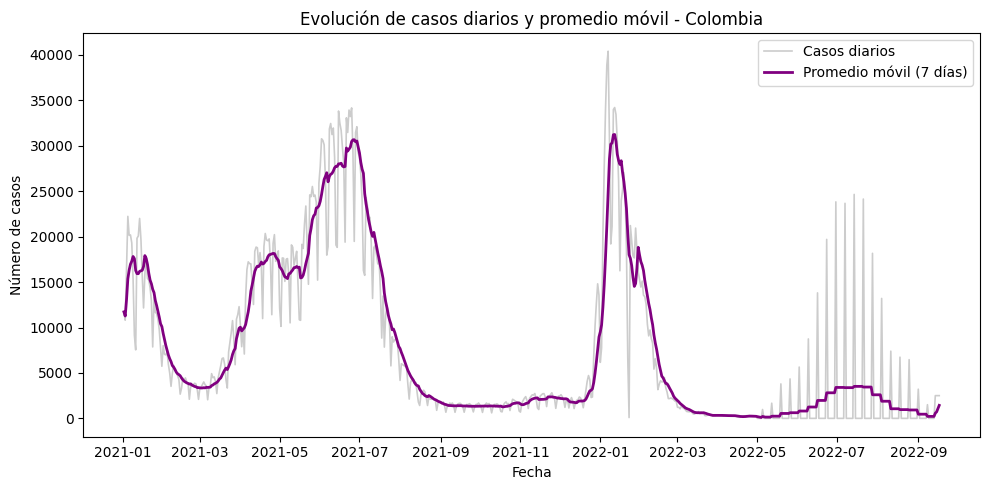

In [41]:
pais = 'Colombia'
df_pais = df_byogenesis[df_byogenesis['country_name'] == pais]

plt.figure(figsize=(10,5))

# Serie diaria original
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='new_confirmed', 
    label='Casos diarios', 
    alpha=0.4, 
    linewidth=1.2,
    color='gray'
)

# Promedio móvil
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='pm_casos', 
    label='Promedio móvil (7 días)',
    color='purple',
    linewidth=2,
    ci=None  # Quitar banda de confianza (error bars)
)

plt.title(f'Evolución de casos diarios y promedio móvil - {pais}')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\3683554268.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


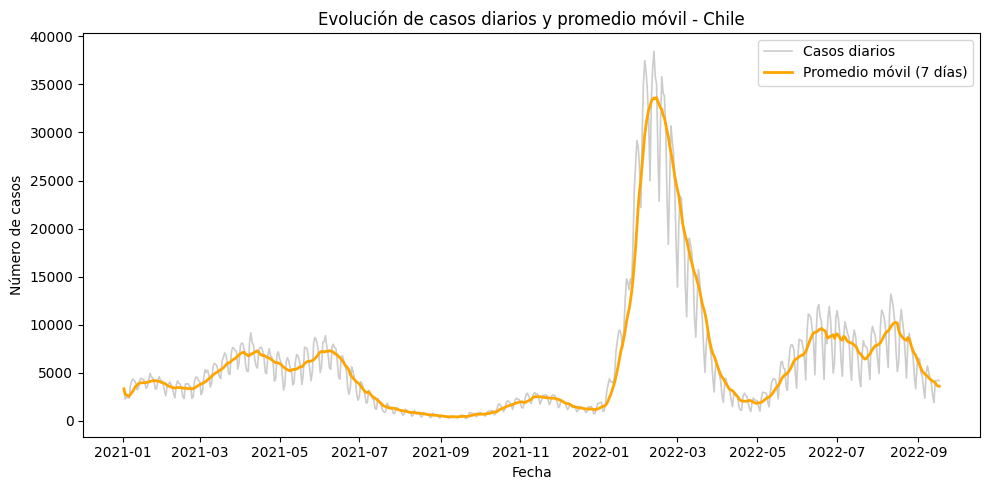

In [42]:
pais = 'Chile'
df_pais = df_byogenesis[df_byogenesis['country_name'] == pais]

plt.figure(figsize=(10,5))

# Serie diaria original
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='new_confirmed', 
    label='Casos diarios', 
    alpha=0.4, 
    linewidth=1.2,
    color='gray'
)

# Promedio móvil
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='pm_casos', 
    label='Promedio móvil (7 días)',
    color='orange',
    linewidth=2,
    ci=None  # Quitar banda de confianza (error bars)
)

plt.title(f'Evolución de casos diarios y promedio móvil - {pais}')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.tight_layout()
plt.show()


Promedio Móvil de muertes en cada país

C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\593597420.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


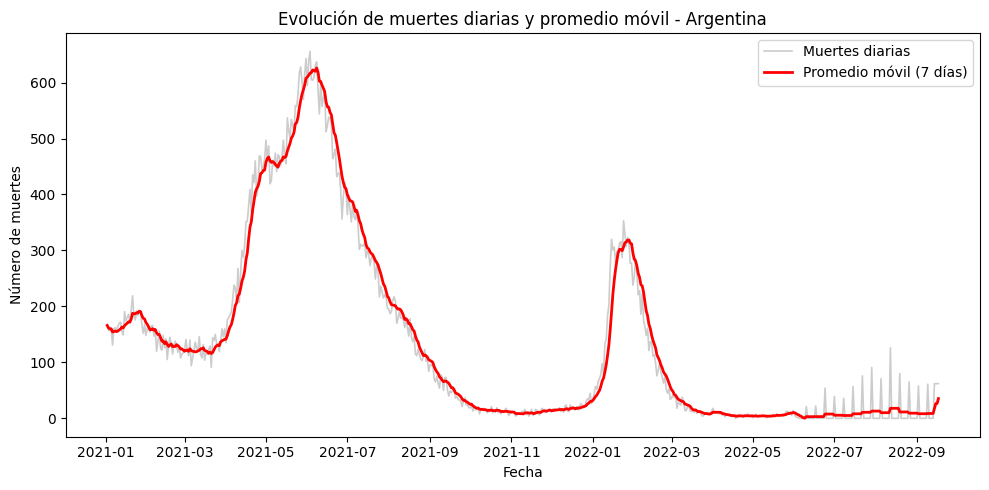

In [43]:
pais = 'Argentina'
df_pais = df_byogenesis[df_byogenesis['country_name'] == pais]

plt.figure(figsize=(10,5))

# Serie diaria original
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='new_deceased', 
    label='Muertes diarias', 
    alpha=0.4, 
    linewidth=1.2,
    color='gray'
)

# Promedio móvil
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='pm_muertes', 
    label='Promedio móvil (7 días)',
    color='red',
    linewidth=2,
    ci=None  # Quitar banda de confianza (error bars)
)

plt.title(f'Evolución de muertes diarias y promedio móvil - {pais}')
plt.xlabel('Fecha')
plt.ylabel('Número de muertes')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\3533827524.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


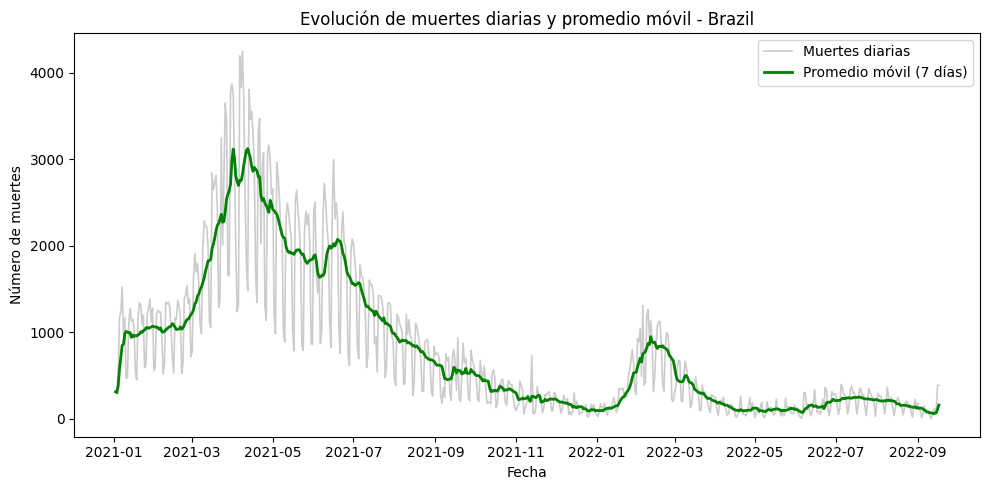

In [44]:
pais = 'Brazil'
df_pais = df_byogenesis[df_byogenesis['country_name'] == pais]

plt.figure(figsize=(10,5))

# Serie diaria original
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='new_deceased', 
    label='Muertes diarias', 
    alpha=0.4, 
    linewidth=1.2,
    color='gray'
)

# Promedio móvil
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='pm_muertes', 
    label='Promedio móvil (7 días)',
    color='green',
    linewidth=2,
    ci=None  # Quitar banda de confianza (error bars)
)

plt.title(f'Evolución de muertes diarias y promedio móvil - {pais}')
plt.xlabel('Fecha')
plt.ylabel('Número de muertes')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\3745167264.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


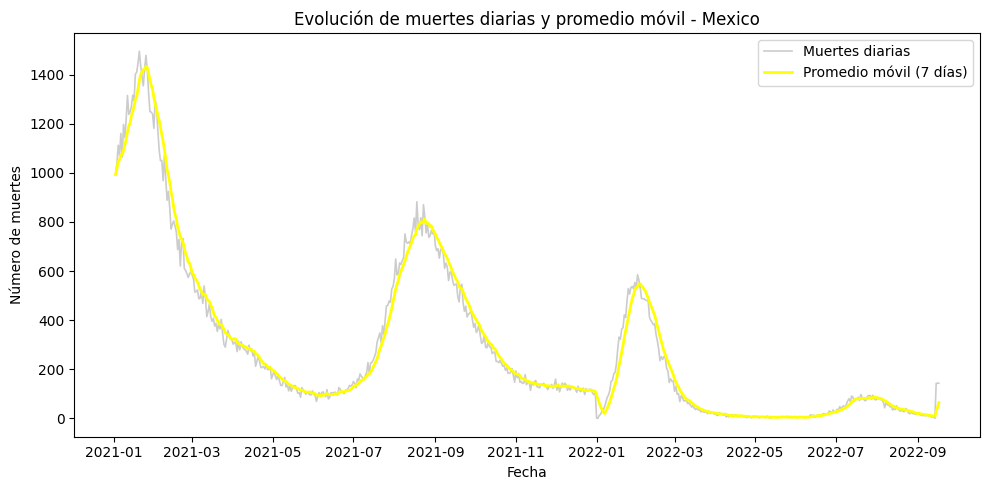

In [45]:
pais = 'Mexico'
df_pais = df_byogenesis[df_byogenesis['country_name'] == pais]

plt.figure(figsize=(10,5))

# Serie diaria original
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='new_deceased', 
    label='Muertes diarias', 
    alpha=0.4, 
    linewidth=1.2,
    color='gray'
)

# Promedio móvil
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='pm_muertes', 
    label='Promedio móvil (7 días)',
    color='yellow',
    linewidth=2,
    ci=None  # Quitar banda de confianza (error bars)
)

plt.title(f'Evolución de muertes diarias y promedio móvil - {pais}')
plt.xlabel('Fecha')
plt.ylabel('Número de muertes')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\395548421.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


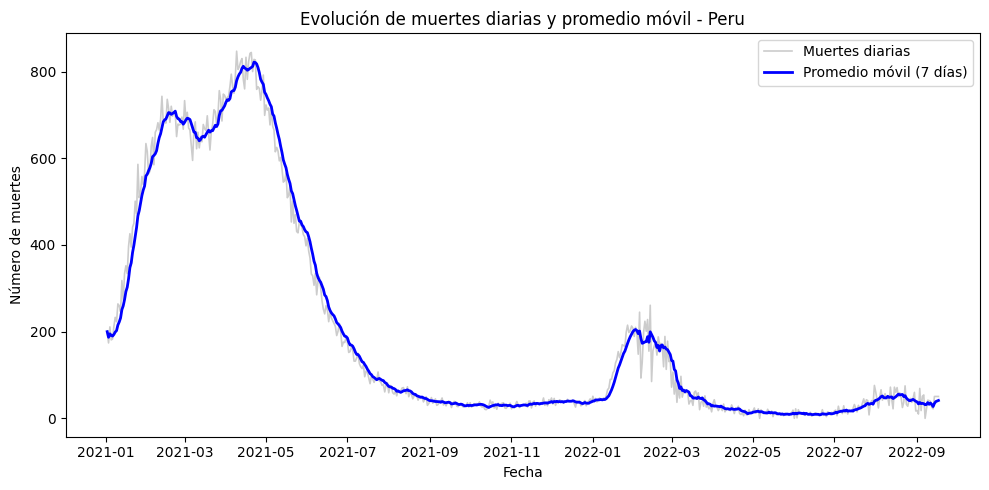

In [46]:
pais = 'Peru'
df_pais = df_byogenesis[df_byogenesis['country_name'] == pais]

plt.figure(figsize=(10,5))

# Serie diaria original
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='new_deceased', 
    label='Muertes diarias', 
    alpha=0.4, 
    linewidth=1.2,
    color='gray'
)

# Promedio móvil
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='pm_muertes', 
    label='Promedio móvil (7 días)',
    color='blue',
    linewidth=2,
    ci=None  # Quitar banda de confianza (error bars)
)

plt.title(f'Evolución de muertes diarias y promedio móvil - {pais}')
plt.xlabel('Fecha')
plt.ylabel('Número de muertes')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\249788851.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


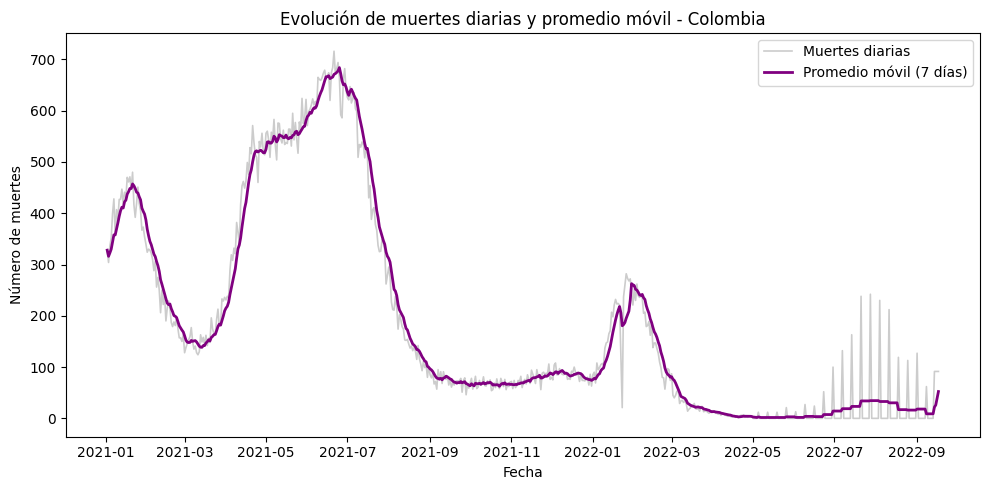

In [47]:
pais = 'Colombia'
df_pais = df_byogenesis[df_byogenesis['country_name'] == pais]

plt.figure(figsize=(10,5))

# Serie diaria original
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='new_deceased', 
    label='Muertes diarias', 
    alpha=0.4, 
    linewidth=1.2,
    color='gray'
)

# Promedio móvil
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='pm_muertes', 
    label='Promedio móvil (7 días)',
    color='purple',
    linewidth=2,
    ci=None  # Quitar banda de confianza (error bars)
)

plt.title(f'Evolución de muertes diarias y promedio móvil - {pais}')
plt.xlabel('Fecha')
plt.ylabel('Número de muertes')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\1671420561.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


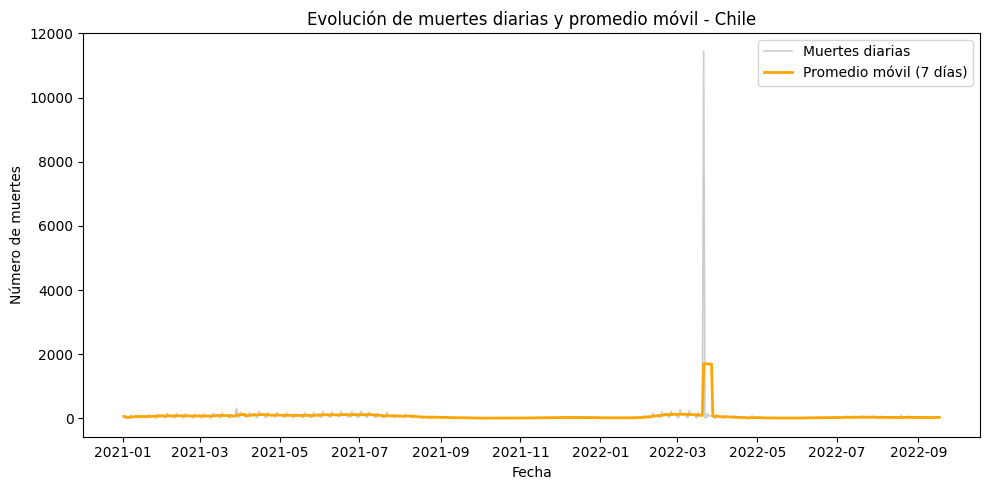

In [48]:
pais = 'Chile'
df_pais = df_byogenesis[df_byogenesis['country_name'] == pais]

plt.figure(figsize=(10,5))

# Serie diaria original
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='new_deceased', 
    label='Muertes diarias', 
    alpha=0.4, 
    linewidth=1.2,
    color='gray'
)

# Promedio móvil
sns.lineplot(
    data=df_pais, 
    x='date', 
    y='pm_muertes', 
    label='Promedio móvil (7 días)',
    color='orange',
    linewidth=2,
    ci=None  # Quitar banda de confianza (error bars)
)

plt.title(f'Evolución de muertes diarias y promedio móvil - {pais}')
plt.xlabel('Fecha')
plt.ylabel('Número de muertes')
plt.legend()
plt.tight_layout()
plt.show()

Análisis Espacial

Total de muertes por País

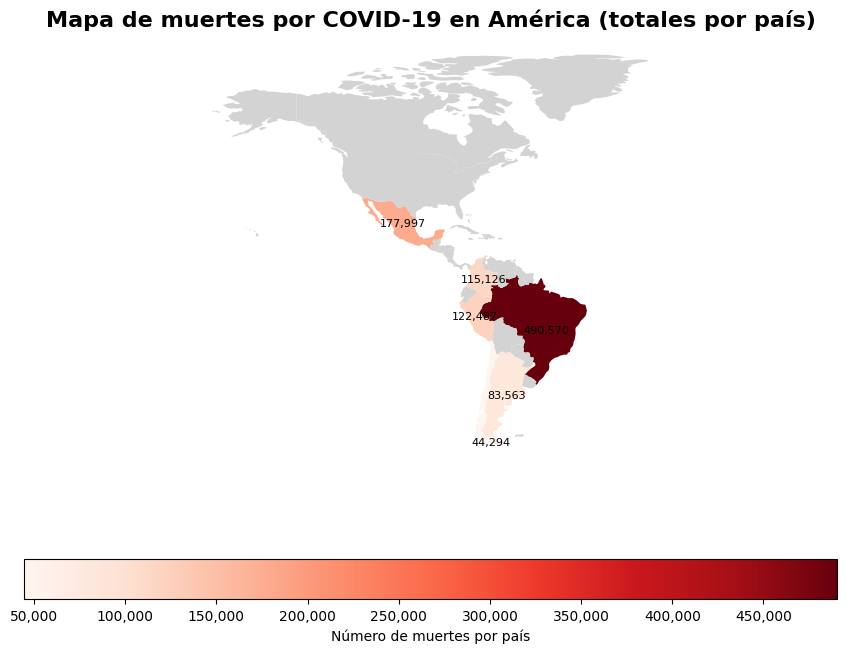

In [49]:
#Importo ticker para manipular la barra de color del mapa
from matplotlib import ticker as mticker
# Agrupar tu dataset por país
df_muertes = df_byogenesis.groupby('country_name', as_index=False)['new_deceased'].sum()

# Cargar el mapa y filtrar América
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
america = world[world['CONTINENT'].isin(['North America', 'South America'])]
merged = america.merge(df_muertes, how='left', left_on='NAME', right_on='country_name')

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(15, 8))

# Graficar el mapa
merged.plot(
    column='new_deceased',
    cmap='Reds',
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "Sin datos"},
    legend_kwds={'label': "Número de muertes por país", 'orientation': "horizontal", 'shrink': 0.7}
)

# Buscar el colorbar que creó geopandas
cbar = ax.get_figure().axes[-1]  # normalmente es el último eje
cbar.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # muestra enteros con separador de miles

# Agregar etiquetas con número exacto de muertes sobre cada país
for idx, row in merged.iterrows():
    if not pd.isna(row['new_deceased']):
        x, y = row['geometry'].representative_point().coords[0]
        ax.text(x, y, f"{int(row['new_deceased']):,}", ha='center', va='center', fontsize=8, color='black')

# Personalizar
ax.set_title("Mapa de muertes por COVID-19 en América (totales por país)", fontsize=16, fontweight='bold')
ax.axis('off')
plt.show()

Total de Casos Confirmados por País

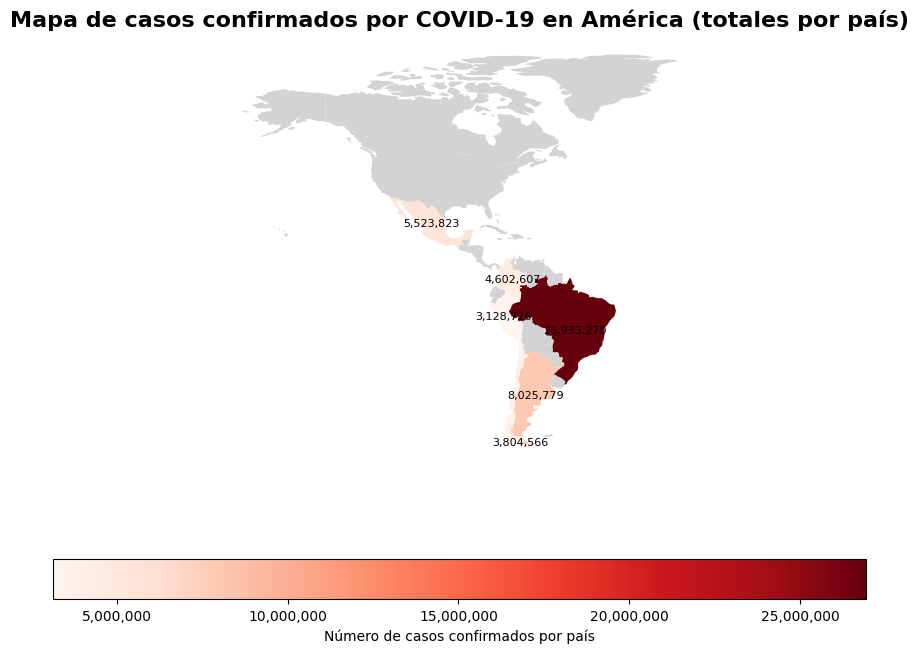

In [50]:
#Importo ticker para manipular la barra de color del mapa
from matplotlib import ticker as mticker
# Agrupar tu dataset por país
df_casos = df_byogenesis.groupby('country_name', as_index=False)['new_confirmed'].sum()

# Cargar el mapa y filtrar América
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
america = world[world['CONTINENT'].isin(['North America', 'South America'])]
merged = america.merge(df_casos, how='left', left_on='NAME', right_on='country_name')

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(15, 8))

# Graficar el mapa
merged.plot(
    column='new_confirmed',
    cmap='Reds',
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "Sin datos"},
    legend_kwds={'label': "Número de casos confirmados por país", 'orientation': "horizontal", 'shrink': 0.7}
)

# Buscar el colorbar que creó geopandas
cbar = ax.get_figure().axes[-1]  # normalmente es el último eje
cbar.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # muestra enteros con separador de miles

# Agregar etiquetas con número exacto de casos confirmados sobre cada país
for idx, row in merged.iterrows():
    if not pd.isna(row['new_confirmed']):
        x, y = row['geometry'].representative_point().coords[0]
        ax.text(x, y, f"{int(row['new_confirmed']):,}", ha='center', va='center', fontsize=8, color='black')

# Personalizar
ax.set_title("Mapa de casos confirmados por COVID-19 en América (totales por país)", fontsize=16, fontweight='bold')
ax.axis('off')
plt.show()

Otras correlaciones

Relación entre casos confirmados, fallecimientos y las población urbana y rural

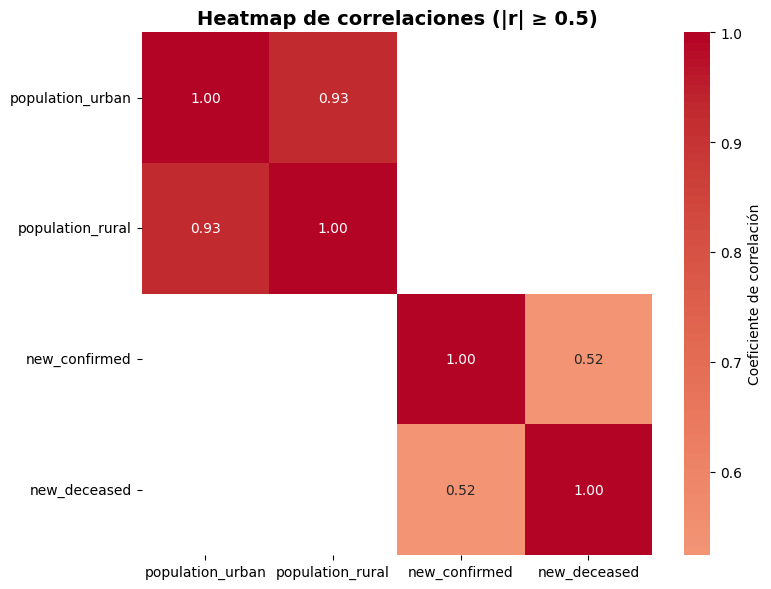

In [51]:
# Seleccionar las columnas relevantes
vars_interes = ['population_urban', 'population_rural', 'new_confirmed', 'new_deceased']

# Calcular la matriz de correlación
corr = df_byogenesis[vars_interes].corr()

# Crear la máscara para ocultar correlaciones débiles
mask = (corr.abs() < 0.5)  # True donde la correlación es menor a 0.5 o mayor a -0.5

# Configurar el gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,             # Muestra los valores en cada celda
    fmt=".2f",              # Dos decimales
    cmap="coolwarm",        # Colores rojo-azul
    mask=mask,              # Aplica la máscara
    center=0,               # Centra la escala en 0
    cbar_kws={'label': 'Coeficiente de correlación'}
)

plt.title("Heatmap de correlaciones (|r| ≥ 0.5)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Relación entre la la acumulación de fallecimientos y casos confirmados en las áreas urbanas y rurales

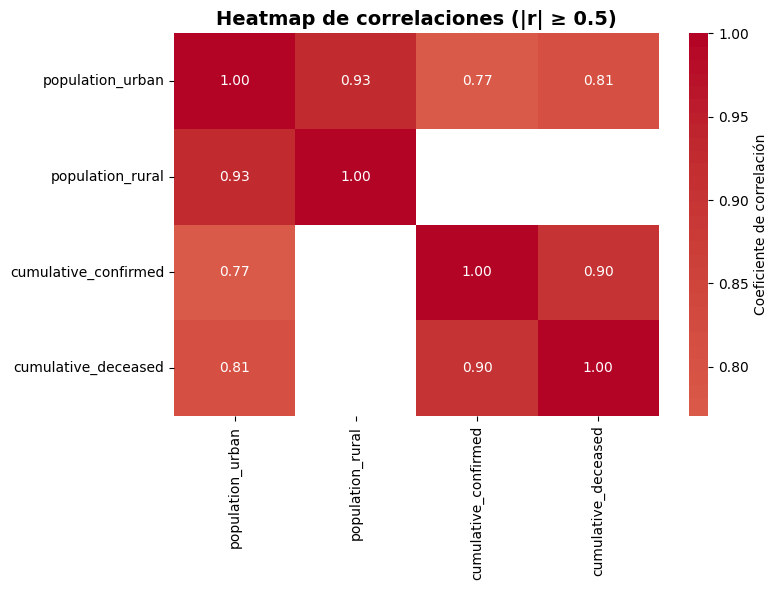

In [52]:
# Seleccionar las columnas relevantes
vars_interes = ['population_urban', 'population_rural', 'cumulative_confirmed', 'cumulative_deceased']

# Calcular la matriz de correlación
corr = df_byogenesis[vars_interes].corr()

# Crear la máscara para ocultar correlaciones débiles
mask = (corr.abs() < 0.75)  # True donde la correlación es menor a 0.5 o mayor a -0.5

# Configurar el gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,             # Muestra los valores en cada celda
    fmt=".2f",              # Dos decimales
    cmap="coolwarm",        # Colores rojo-azul
    mask=mask,              # Aplica la máscara
    center=0,               # Centra la escala en 0
    cbar_kws={'label': 'Coeficiente de correlación'}
)

plt.title("Heatmap de correlaciones (|r| ≥ 0.5)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Predicción de nuevos casos para 2023

<>:94: SyntaxWarning: invalid escape sequence '\g'
<>:94: SyntaxWarning: invalid escape sequence '\g'
C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\134657333.py:94: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel("Nuevos Casos Diarios (Predicción Ajustada $\geq 0$)", fontsize=14) # <-- Etiqueta Y más grande
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


Prediciendo para: Argentina


17:39:48 - cmdstanpy - INFO - Chain [1] start processing
17:39:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
17:39:48 - cmdstanpy - INFO - Chain [1] start processing


Prediciendo para: Brazil


17:39:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
17:39:48 - cmdstanpy - INFO - Chain [1] start processing


Prediciendo para: Chile


17:39:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Prediciendo para: Colombia


17:39:49 - cmdstanpy - INFO - Chain [1] start processing
17:39:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Prediciendo para: Mexico


17:39:50 - cmdstanpy - INFO - Chain [1] start processing
17:39:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Prediciendo para: Peru


17:39:51 - cmdstanpy - INFO - Chain [1] start processing
17:39:51 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



Predicciones guardadas en 'prediccion_covid_por_pais.csv'


C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\134657333.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = cm.get_cmap('jet', len(paises))


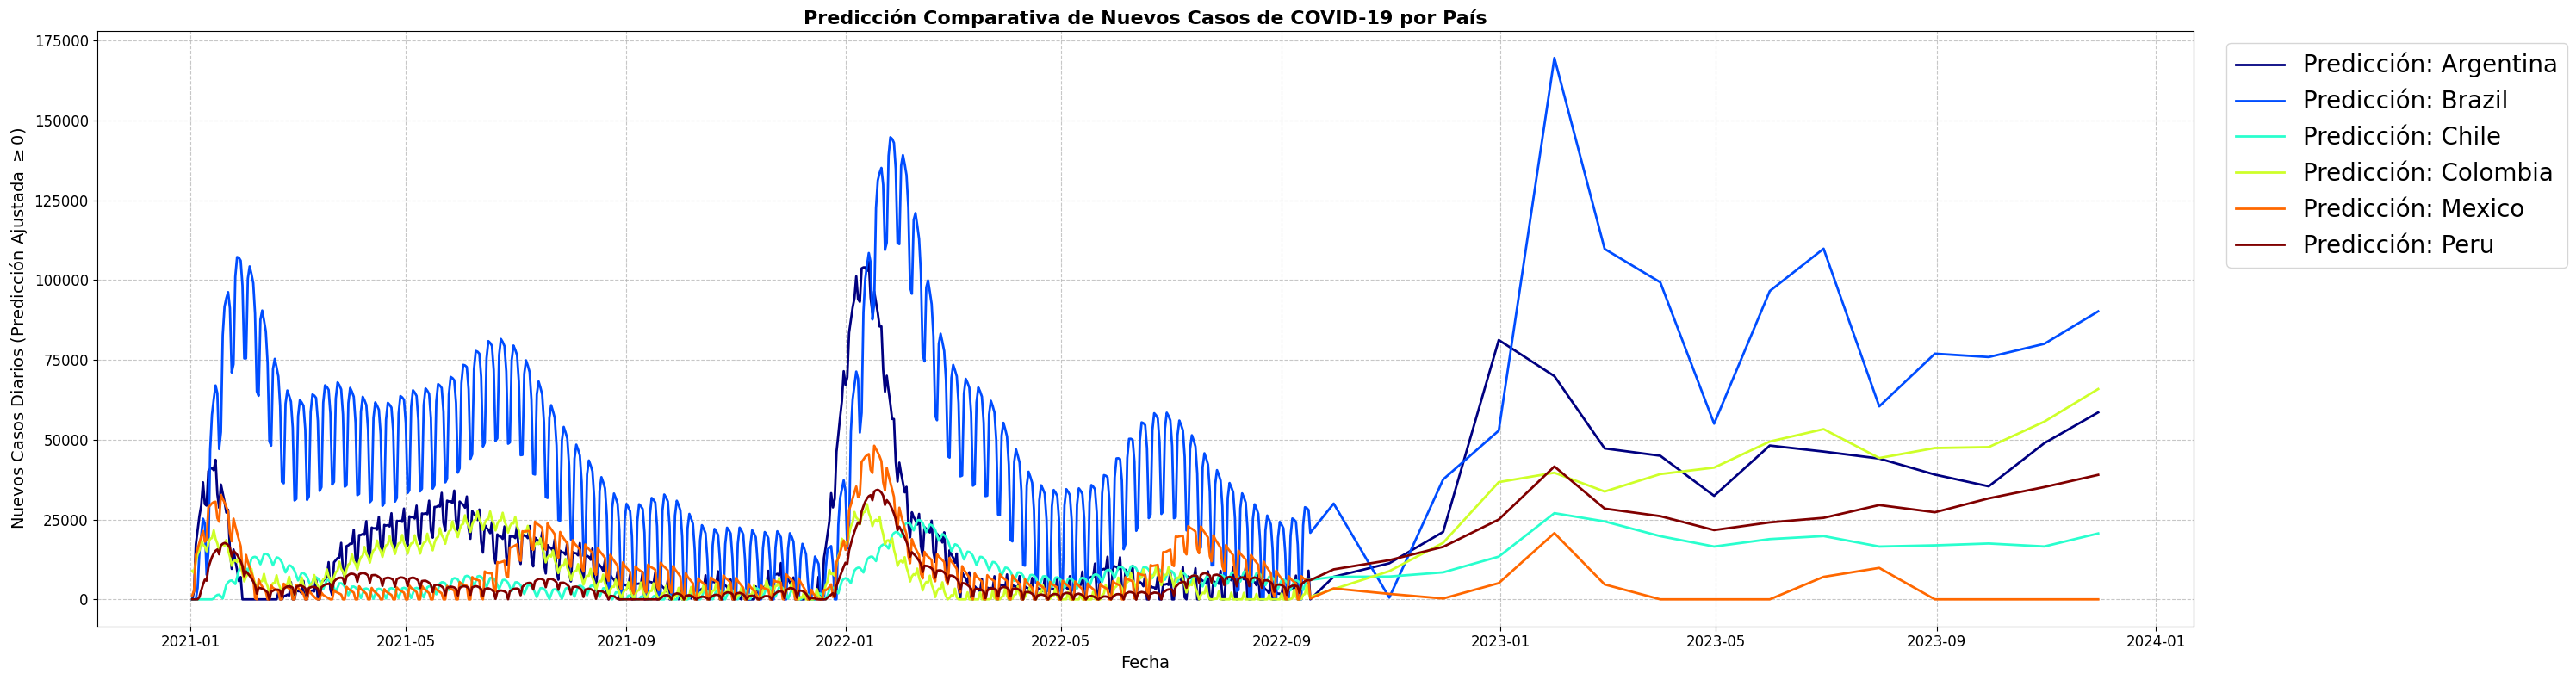

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Necesario para usar una paleta de colores
import numpy as np # Importar numpy para la paleta de colores

#Cargar y preparar los datos
df = pd.read_csv("C:/Users/FranciscoJH/Downloads/DatosFinalesFiltrado.csv") #Se debe cambiar la ruta al archivo CSV en tu computadora

# Renombrar columnas a formato Prophet
df = df.rename(columns={'date': 'ds', 'new_confirmed': 'y', 'country_name': 'country'})

# Convertir la columna de fecha a tipo datetime (si no lo está ya)
df['ds'] = pd.to_datetime(df['ds'])

#Predicción por País (Loop)
# Obtener la lista única de países para iterar
paises = df['country'].unique()

# DataFrame vacío para almacenar todas las predicciones
todas_predicciones = pd.DataFrame()
    
# Iterar sobre cada país
for pais in paises:
    print(f"Prediciendo para: {pais}")
    
    # Filtrar los datos para el país actual
    df_pais = df[df['country'] == pais].copy()
    
    # Crear y entrenar el modelo (se entrena uno nuevo para cada país)
    # Se añade la configuración para manejar potencial estacionalidad
    modelo = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True) 
    # Usar 'df_pais' que solo tiene los datos del país actual
    modelo.fit(df_pais) 
    
    # Crear el dataframe futuro: 15 meses adicionales
    futuro = modelo.make_future_dataframe(periods=15, freq='M')
    
    # Hacer la predicción
    prediccion_pais = modelo.predict(futuro)
    
    #Eliminar valores negativos de la predicción 
    # La predicción estimada es 'yhat'. Si es menor que 0, se establece a 0.
    prediccion_pais['yhat'] = prediccion_pais['yhat'].apply(lambda x: max(0, x))
    # También se aplica a los límites inferiores de confianza (yhat_lower)
    prediccion_pais['yhat_lower'] = prediccion_pais['yhat_lower'].apply(lambda x: max(0, x))

    # Añadir la columna de país a las predicciones
    prediccion_pais['country'] = pais
    
    # Seleccionar las columnas relevantes y añadirlas al dataframe global
    predicciones_filtradas = prediccion_pais[['ds', 'country', 'yhat', 'yhat_lower', 'yhat_upper']]
    todas_predicciones = pd.concat([todas_predicciones, predicciones_filtradas], ignore_index=True)

# --- 4. Guardar el resultado ---
todas_predicciones.to_csv(
    "C:/Users/FranciscoJH/Downloads/prediccion_covid_por_pais.csv", index=False
)
print("\nPredicciones guardadas en 'prediccion_covid_por_pais.csv'")


# Visualizar el resultado


plt.figure(figsize=(30, 8))

# Generar una paleta de colores para todos los países
# Usamos un mapa de colores como 'viridis' o 'jet' para asegurar distinción
colores = cm.get_cmap('jet', len(paises)) 

# Iterar y graficar cada país en el mismo eje
for i, pais in enumerate(paises):
    df_plot = todas_predicciones[todas_predicciones['country'] == pais]
    color = colores(i)
    
    # Graficar solo la línea de predicción 'yhat'
    plt.plot(df_plot['ds'], 
             df_plot['yhat'], 
             label=f'Predicción: {pais}', 
             color=color, 
             linewidth=2)

    # Opcional: Graficar los datos históricos como pequeños puntos para contexto
    df_hist = df[df['country'] == pais]
    #plt.scatter(df_hist['ds'], df_hist['y'], color=color, alpha=0.4, s=5, label=f'Datos Históricos: {pais}' if i == 0 else "")


# Configuración del gráfico final
plt.title("Predicción Comparativa de Nuevos Casos de COVID-19 por País", 
          fontsize=16, # <-- Título más grande
          fontweight='bold') 
# 2. Etiquetas de Ejes: Aumenta el 'fontsize'
plt.xlabel("Fecha", fontsize=14) # <-- Etiqueta X más grande
plt.ylabel("Nuevos Casos Diarios (Predicción Ajustada $\geq 0$)", fontsize=14) # <-- Etiqueta Y más grande

# 3. Etiquetas de Ticks (Números/Fechas en los ejes)
# Esta función ajusta el tamaño de los números y fechas en los ejes.
plt.tick_params(axis='both', which='major', labelsize=12) # <-- Ticks más grandes

# 4. Leyenda: Aumenta el 'fontsize'
plt.legend(loc='upper left', 
           bbox_to_anchor=(1.01, 1), 
           fontsize=20) # <-- Texto de la leyenda más grande
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Ajustar el espacio para la leyenda
plt.show()


Predicción de fallecimientos para 2023

<>:94: SyntaxWarning: invalid escape sequence '\g'
<>:94: SyntaxWarning: invalid escape sequence '\g'
C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\3678613991.py:94: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel("Nuevos Fallecimientos Diarios (Predicción Ajustada $\geq 0$)", fontsize=14) # <-- Etiqueta Y más grande
17:39:52 - cmdstanpy - INFO - Chain [1] start processing


Prediciendo para: Argentina


17:39:52 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
17:39:52 - cmdstanpy - INFO - Chain [1] start processing


Prediciendo para: Brazil


17:39:52 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
17:39:53 - cmdstanpy - INFO - Chain [1] start processing
17:39:53 - cmdstanpy - INFO - Chain [1] done processing


Prediciendo para: Chile


C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
17:39:53 - cmdstanpy - INFO - Chain [1] start processing


Prediciendo para: Colombia


17:39:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
17:39:53 - cmdstanpy - INFO - Chain [1] start processing


Prediciendo para: Mexico


17:39:54 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Prediciendo para: Peru


17:39:54 - cmdstanpy - INFO - Chain [1] start processing
17:39:55 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\FranciscoJH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



Predicciones guardadas en 'prediccion_muertes_covid_por_pais.csv'


C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_10800\3678613991.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = cm.get_cmap('jet', len(paises))


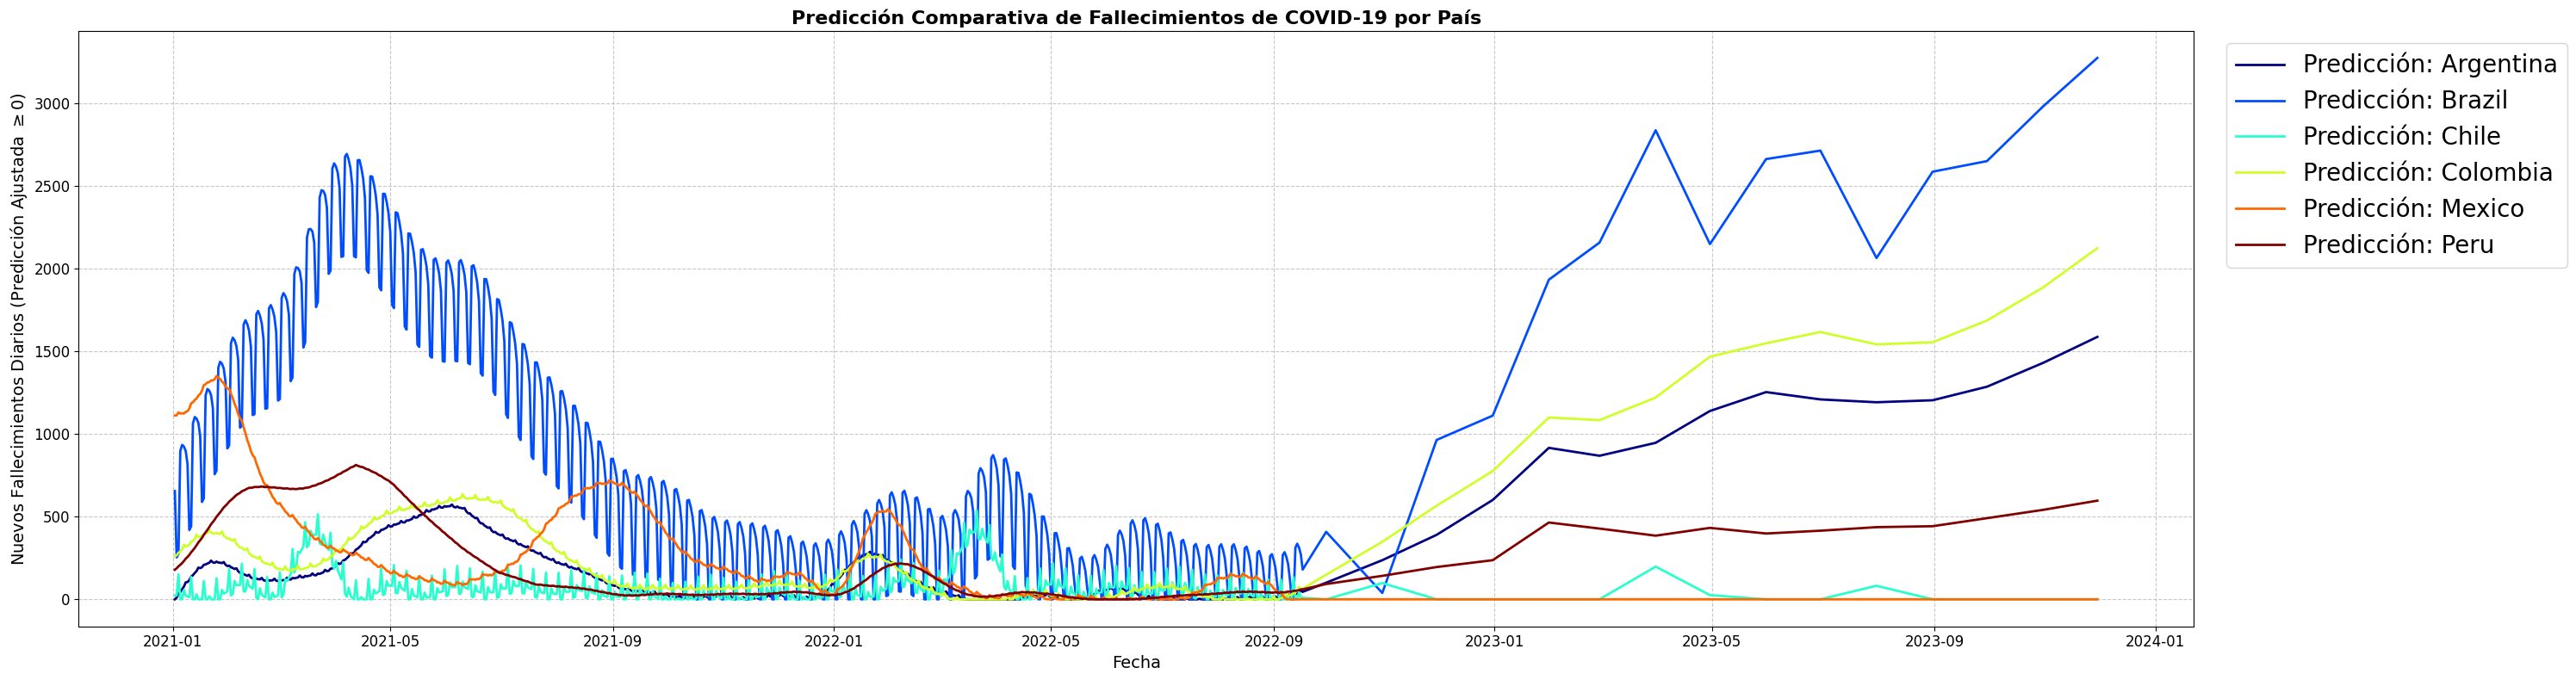

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Necesario para usar una paleta de colores
import numpy as np # Importar numpy para la paleta de colores

#Cargar y preparar los datos
df = pd.read_csv("C:/Users/FranciscoJH/Downloads/DatosFinalesFiltrado.csv") #Se debe cambiar la ruta al archivo CSV en tu computadora

# Renombrar columnas a formato Prophet
df = df.rename(columns={'date': 'ds', 'new_deceased': 'y', 'country_name': 'country'})

# Convertir la columna de fecha a tipo datetime (si no lo está ya)
df['ds'] = pd.to_datetime(df['ds'])

#Predicción por País (Loop)
# Obtener la lista única de países para iterar
paises = df['country'].unique()

# DataFrame vacío para almacenar todas las predicciones
todas_predicciones = pd.DataFrame()
    
# Iterar sobre cada país
for pais in paises:
    print(f"Prediciendo para: {pais}")
    
    # Filtrar los datos para el país actual
    df_pais = df[df['country'] == pais].copy()
    
    # Crear y entrenar el modelo (se entrena uno nuevo para cada país)
    # Se añade la configuración para manejar potencial estacionalidad
    modelo = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True) 
    # Usar 'df_pais' que solo tiene los datos del país actual
    modelo.fit(df_pais) 
    
    # Crear el dataframe futuro: 15 meses adicionales
    futuro = modelo.make_future_dataframe(periods=15, freq='M')
    
    # Hacer la predicción
    prediccion_pais = modelo.predict(futuro)
    
    #Eliminar valores negativos de la predicción 
    # La predicción estimada es 'yhat'. Si es menor que 0, se establece a 0.
    prediccion_pais['yhat'] = prediccion_pais['yhat'].apply(lambda x: max(0, x))
    # También se aplica a los límites inferiores de confianza (yhat_lower)
    prediccion_pais['yhat_lower'] = prediccion_pais['yhat_lower'].apply(lambda x: max(0, x))

    # Añadir la columna de país a las predicciones
    prediccion_pais['country'] = pais
    
    # Seleccionar las columnas relevantes y añadirlas al dataframe global
    predicciones_filtradas = prediccion_pais[['ds', 'country', 'yhat', 'yhat_lower', 'yhat_upper']]
    todas_predicciones = pd.concat([todas_predicciones, predicciones_filtradas], ignore_index=True)

# --- 4. Guardar el resultado ---
todas_predicciones.to_csv(
    "C:/Users/FranciscoJH/Downloads/prediccion_muertes_covid_por_pais.csv", index=False
)
print("\nPredicciones guardadas en 'prediccion_muertes_covid_por_pais.csv'")


# Visualizar el resultado


plt.figure(figsize=(30, 8))

# Generar una paleta de colores para todos los países
# Usamos un mapa de colores como 'viridis' o 'jet' para asegurar distinción
colores = cm.get_cmap('jet', len(paises)) 

# Iterar y graficar cada país en el mismo eje
for i, pais in enumerate(paises):
    df_plot = todas_predicciones[todas_predicciones['country'] == pais]
    color = colores(i)
    
    # Graficar solo la línea de predicción 'yhat'
    plt.plot(df_plot['ds'], 
             df_plot['yhat'], 
             label=f'Predicción: {pais}', 
             color=color, 
             linewidth=2)

    # Opcional: Graficar los datos históricos como pequeños puntos para contexto
    df_hist = df[df['country'] == pais]
    #plt.scatter(df_hist['ds'], df_hist['y'], color=color, alpha=0.4, s=5, label=f'Datos Históricos: {pais}' if i == 0 else "")


# Configuración del gráfico final
plt.title("Predicción Comparativa de Fallecimientos de COVID-19 por País", 
          fontsize=16, # <-- Título más grande
          fontweight='bold') 
# 2. Etiquetas de Ejes: Aumenta el 'fontsize'
plt.xlabel("Fecha", fontsize=14) # <-- Etiqueta X más grande
plt.ylabel("Nuevos Fallecimientos Diarios (Predicción Ajustada $\geq 0$)", fontsize=14) # <-- Etiqueta Y más grande

# 3. Etiquetas de Ticks (Números/Fechas en los ejes)
# Esta función ajusta el tamaño de los números y fechas en los ejes.
plt.tick_params(axis='both', which='major', labelsize=12) # <-- Ticks más grandes

# 4. Leyenda: Aumenta el 'fontsize'
plt.legend(loc='upper left', 
           bbox_to_anchor=(1.01, 1), 
           fontsize=20) # <-- Texto de la leyenda más grande
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Ajustar el espacio para la leyenda
plt.show()
